### Table of Contents
* [Problem](#problem)
* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Age](#section3_4)
    * [Marketing campaign](#section3_5)
    * [Complains variable](section3_6)
    * [Purchasing Behavior by country](#section3_7)
    * [Web page visitors](#section3_8)
* [Conclusion](#conclusion)

### Problem <a class="anchor" id="Problem"></a>
You're a marketing analyst and you've been told by the Senior Marketing Manager that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set in order to understand this problem and propose data-driven solutions. You are required to solve the following questions to generate a report for your management.

### Goals <a class="anchor" id="Goals"></a>
This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
- Provide Exploratory Data Analysis (EDA Analysis) for the data set
- Get acquainted with the data
- Clean the data so it is ready for analysis
- Develop some questions for analysis
- Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>
The data for this project was downloaded from Kaggle:

https://www.kaggle.com/jackdaoud/marketing-data

Column information:
* ID - Customer's unique identification
* Year_Birth - Customer's birth year
* Education - Customer's education
* Marital_Status - Customer's marital status
* Income - Customer's yearly household income
* Kidhome - # of kids in household
* Teenhome - # of teenagers in household
* Dt_Customer - Date of customer's enrollment with the company
* Recency - # of days since customer's last purchase
* MntWines - Amount spent on wine in the last 2 years
* MntFruits - Amount spent on fruit in the last 2 years
* MntMeatProducts - Amount spent on meat in the last 2 years
* MntFishProducts - Amount spent on fish in the last 2 years
* MntSweetProducts - Amount spent on sweet products in the last 2 years
* MntGoldProds - Amount spent on gold products in the last 2 years
* NumDealsPurchases - # of purchases made with a discount
* NumWebPurchases - # of purchases made on company website
* NumCatalogPurchases - # of purchases made on the catalog
* NumStorePurchases - # of purchase made in store
* NumWebVisitsMonth - # of website visits in the last month
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained within the last 2 years
* Country - Country where the customer is located (not from)

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. 
The pandas library is used to import data from `marketing_data.csv` and preview the first five rows of the DataFrame.

In [336]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column - most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [337]:
marketing_data = pd.read_csv('marketing_data.csv')

In [338]:
marketing_data.head()

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    6/16/14        0       189  ...                  6                  1   
1    6/15/14        0       464  ...                  7                  5   
2    5/13/14        0       134  ...                  5                  2   
3    5/11/14        0        10  ...                  2                  7   
4     4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 28 columns]

In [339]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [340]:
marketing_data.info

<bound method DataFrame.info of          id  YearBirth   Education MaritalStatus       Income  Kidhome  \
0      1826       1970  Graduation      Divorced  $84,835.00         0   
1         1       1961  Graduation        Single  $57,091.00         0   
2     10476       1958  Graduation       Married  $67,267.00         0   
3      1386       1967  Graduation      Together  $32,474.00         1   
4      5371       1989  Graduation        Single  $21,474.00         1   
...     ...        ...         ...           ...          ...      ...   
2235  10142       1976         PhD      Divorced  $66,476.00         0   
2236   5263       1977    2n Cycle       Married  $31,056.00         1   
2237     22       1976  Graduation      Divorced  $46,310.00         1   
2238    528       1978  Graduation       Married  $65,819.00         0   
2239   4070       1969         PhD       Married  $94,871.00         0   

      Teenhome DtCustomer  Recency  MntWines  ...  NumStorePurchases  \
0      

In [341]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [342]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

### Data Cleaning <a class="anchor" id="cleaning"></a>
As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in snake case format using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

In [343]:
#taking dollar sign out of values and convert to float
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)
#put all columns into a snake format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]

In [344]:
marketing_data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

In [345]:
#replace N/A income values with mean values
marketing_data['income'].fillna(marketing_data['income'].mean())

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: income, Length: 2240, dtype: float64

<IPython.core.display.Javascript object>


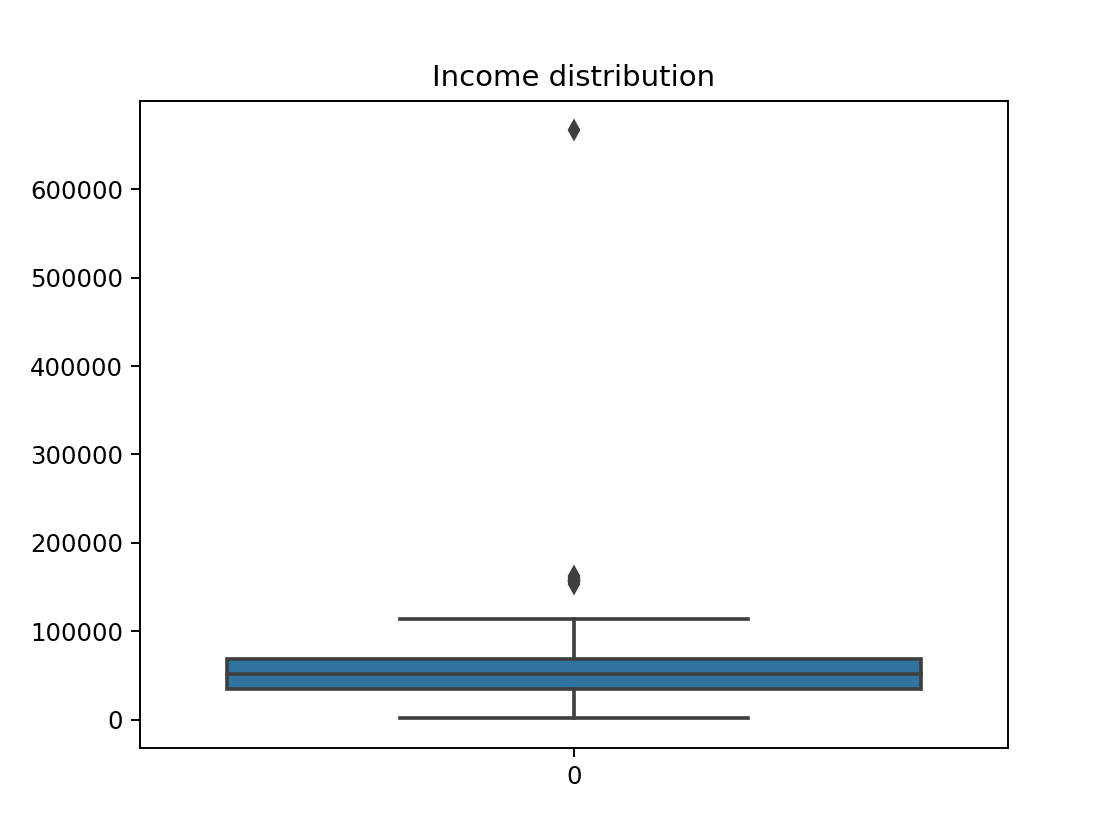

In [346]:
#investigate further
plt.figure()
sns.boxplot(data = marketing_data['income'])
plt.title('Income distribution')
plt.show()

In [347]:
#Get rid of one outliner over 600000
marketing_data = marketing_data[marketing_data.income < 300000]

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `datetiem.now().year`. 
* Any outliers in `age` that could affect the analysis are removed. 

In [348]:
#Year of Birth may be hard to read, we can add an Age column

marketing_data['age'] = datetime.now().year - marketing_data['year_birth']

C:\Users\user\AppData\Local\Temp/ipykernel_20816/2288720158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['age'] = datetime.now().year - marketing_data['year_birth']


<IPython.core.display.Javascript object>


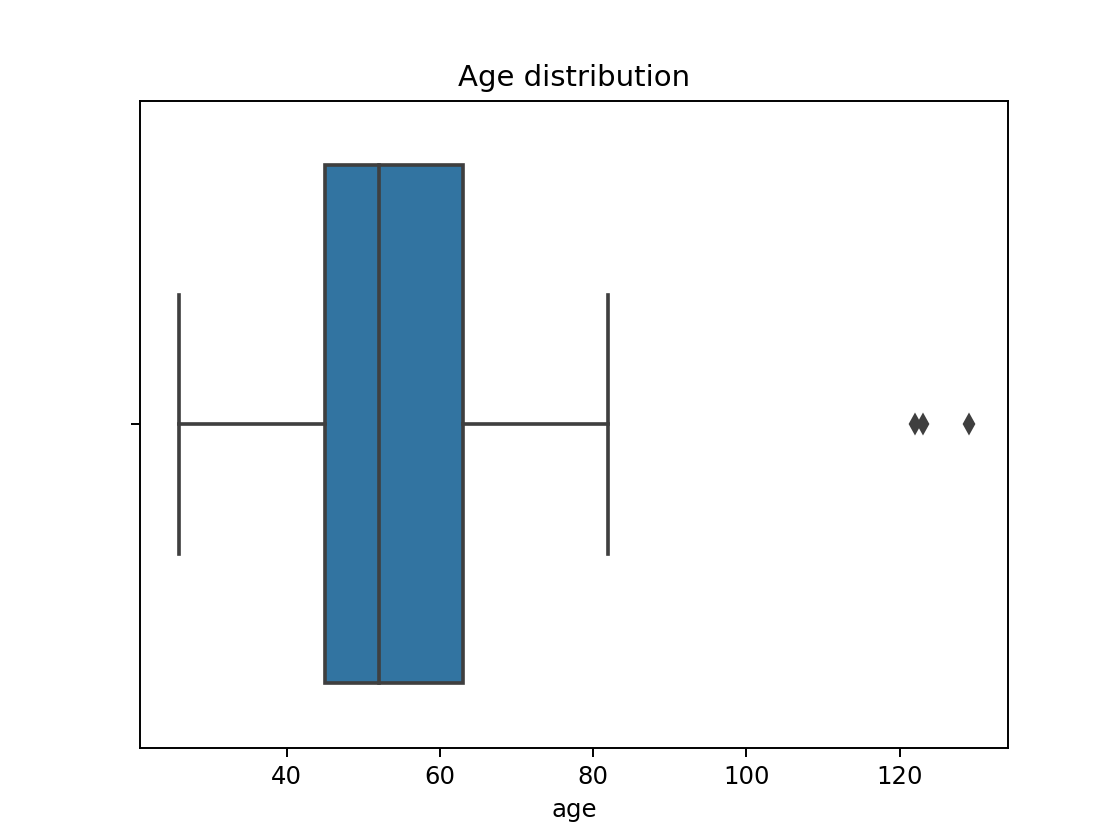

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [349]:
plt.figure()
sns.boxplot(marketing_data['age'])
plt.title('Age distribution')
plt.show()

In [292]:
marketing_data['age'].describe()

count    2215.000000
mean       53.183296
std        11.987000
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: age, dtype: float64

In [293]:
marketing_data = marketing_data[marketing_data['age'] < 100]

After removing the major outliers the `age` distribution is symmetric and ready for analysis.

<IPython.core.display.Javascript object>


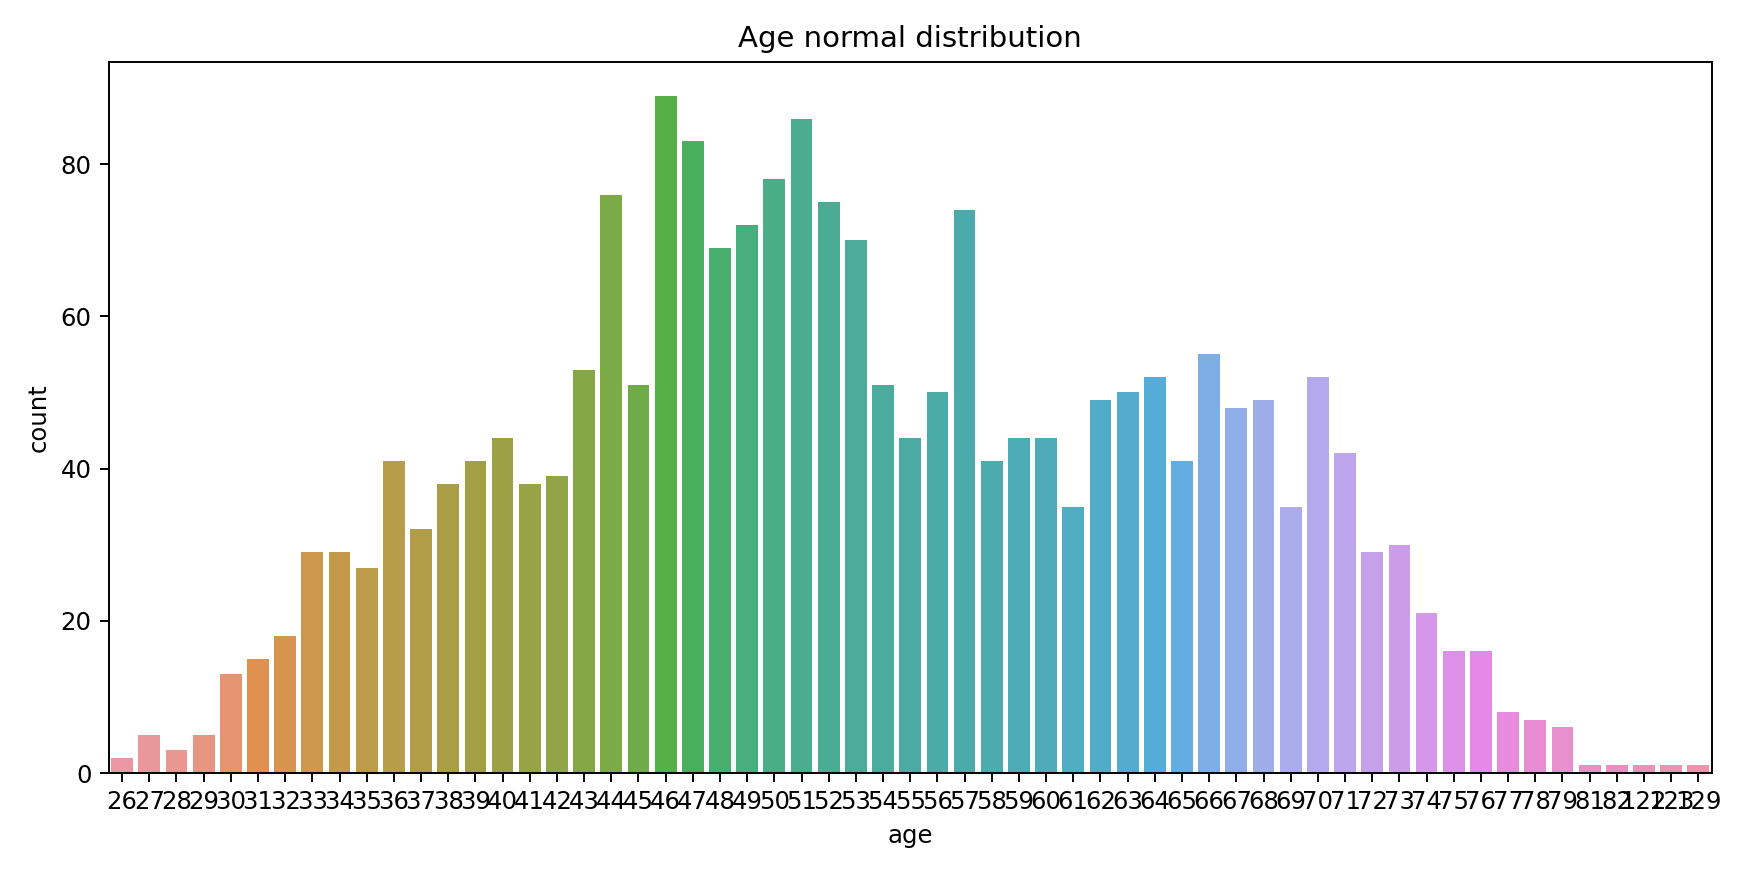

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [350]:
plt.figure(figsize=(10,5))
sns.countplot(marketing_data['age'])
plt.title('Age normal distribution')
plt.tight_layout()
plt.show()

#### Checking the Education Variable <a class="anchor" id="section2_2"></a>

The education variable is another column that will be focused on in the analysis.
There is no missing data or other issues, so it can be left as is.
If there is a correlation between education and income of our customers?
* As we can see, Basic education corresponds with lower income level.

In [351]:
edu_order = ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
marketing_data['education'] = pd.Categorical(marketing_data['education'], edu_order, ordered = True)

C:\Users\user\AppData\Local\Temp/ipykernel_20816/151570368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['education'] = pd.Categorical(marketing_data['education'], edu_order, ordered = True)


<IPython.core.display.Javascript object>


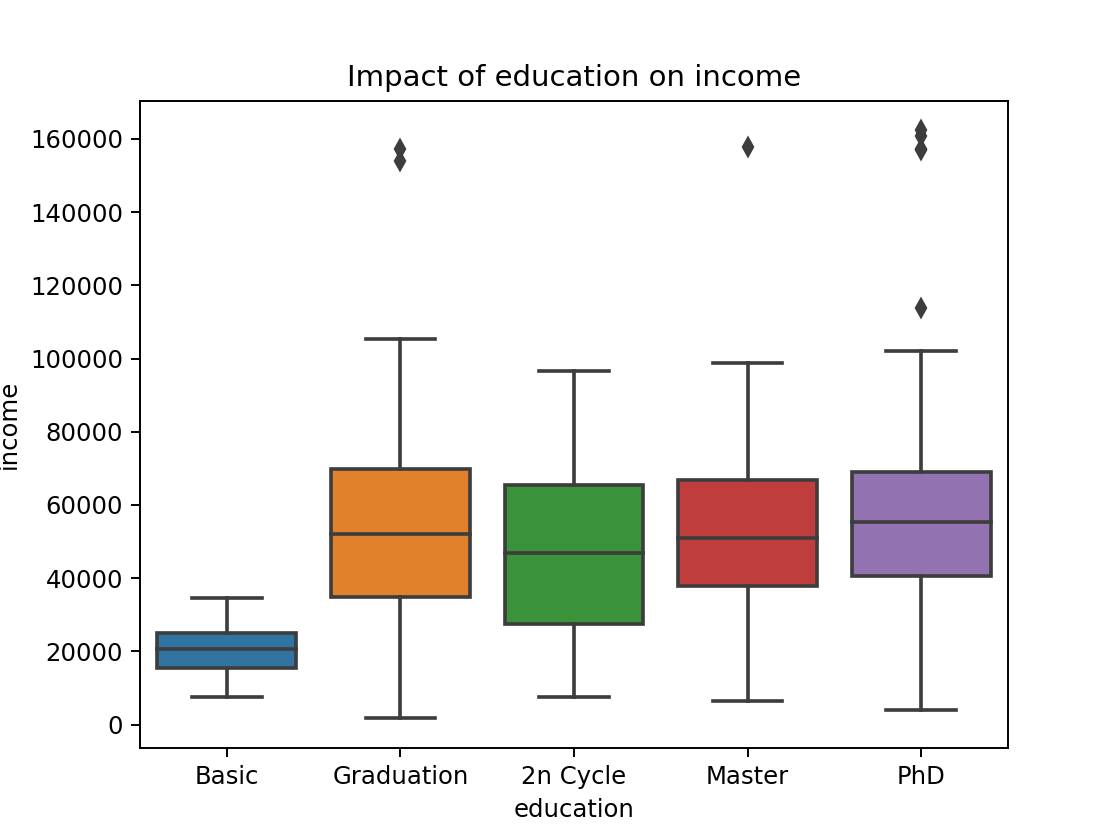

In [352]:
plt.figure()
sns.boxplot(x= marketing_data['education'], 
            y = marketing_data['income'])
plt.title('Impact of education on income')
plt.show()

## Exploratory Data Analysis <a class="anchor" id="eda"></a>


After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`
* `country`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

### Big picture  <a class="anchor" id="section3_1">
DataFrame.hist() method can show a dictribution of every column.

Most of the amount bought and number purchased variables are skewed right and have similar distributions.

The heatmap is used to find the correlation between variables.

<IPython.core.display.Javascript object>


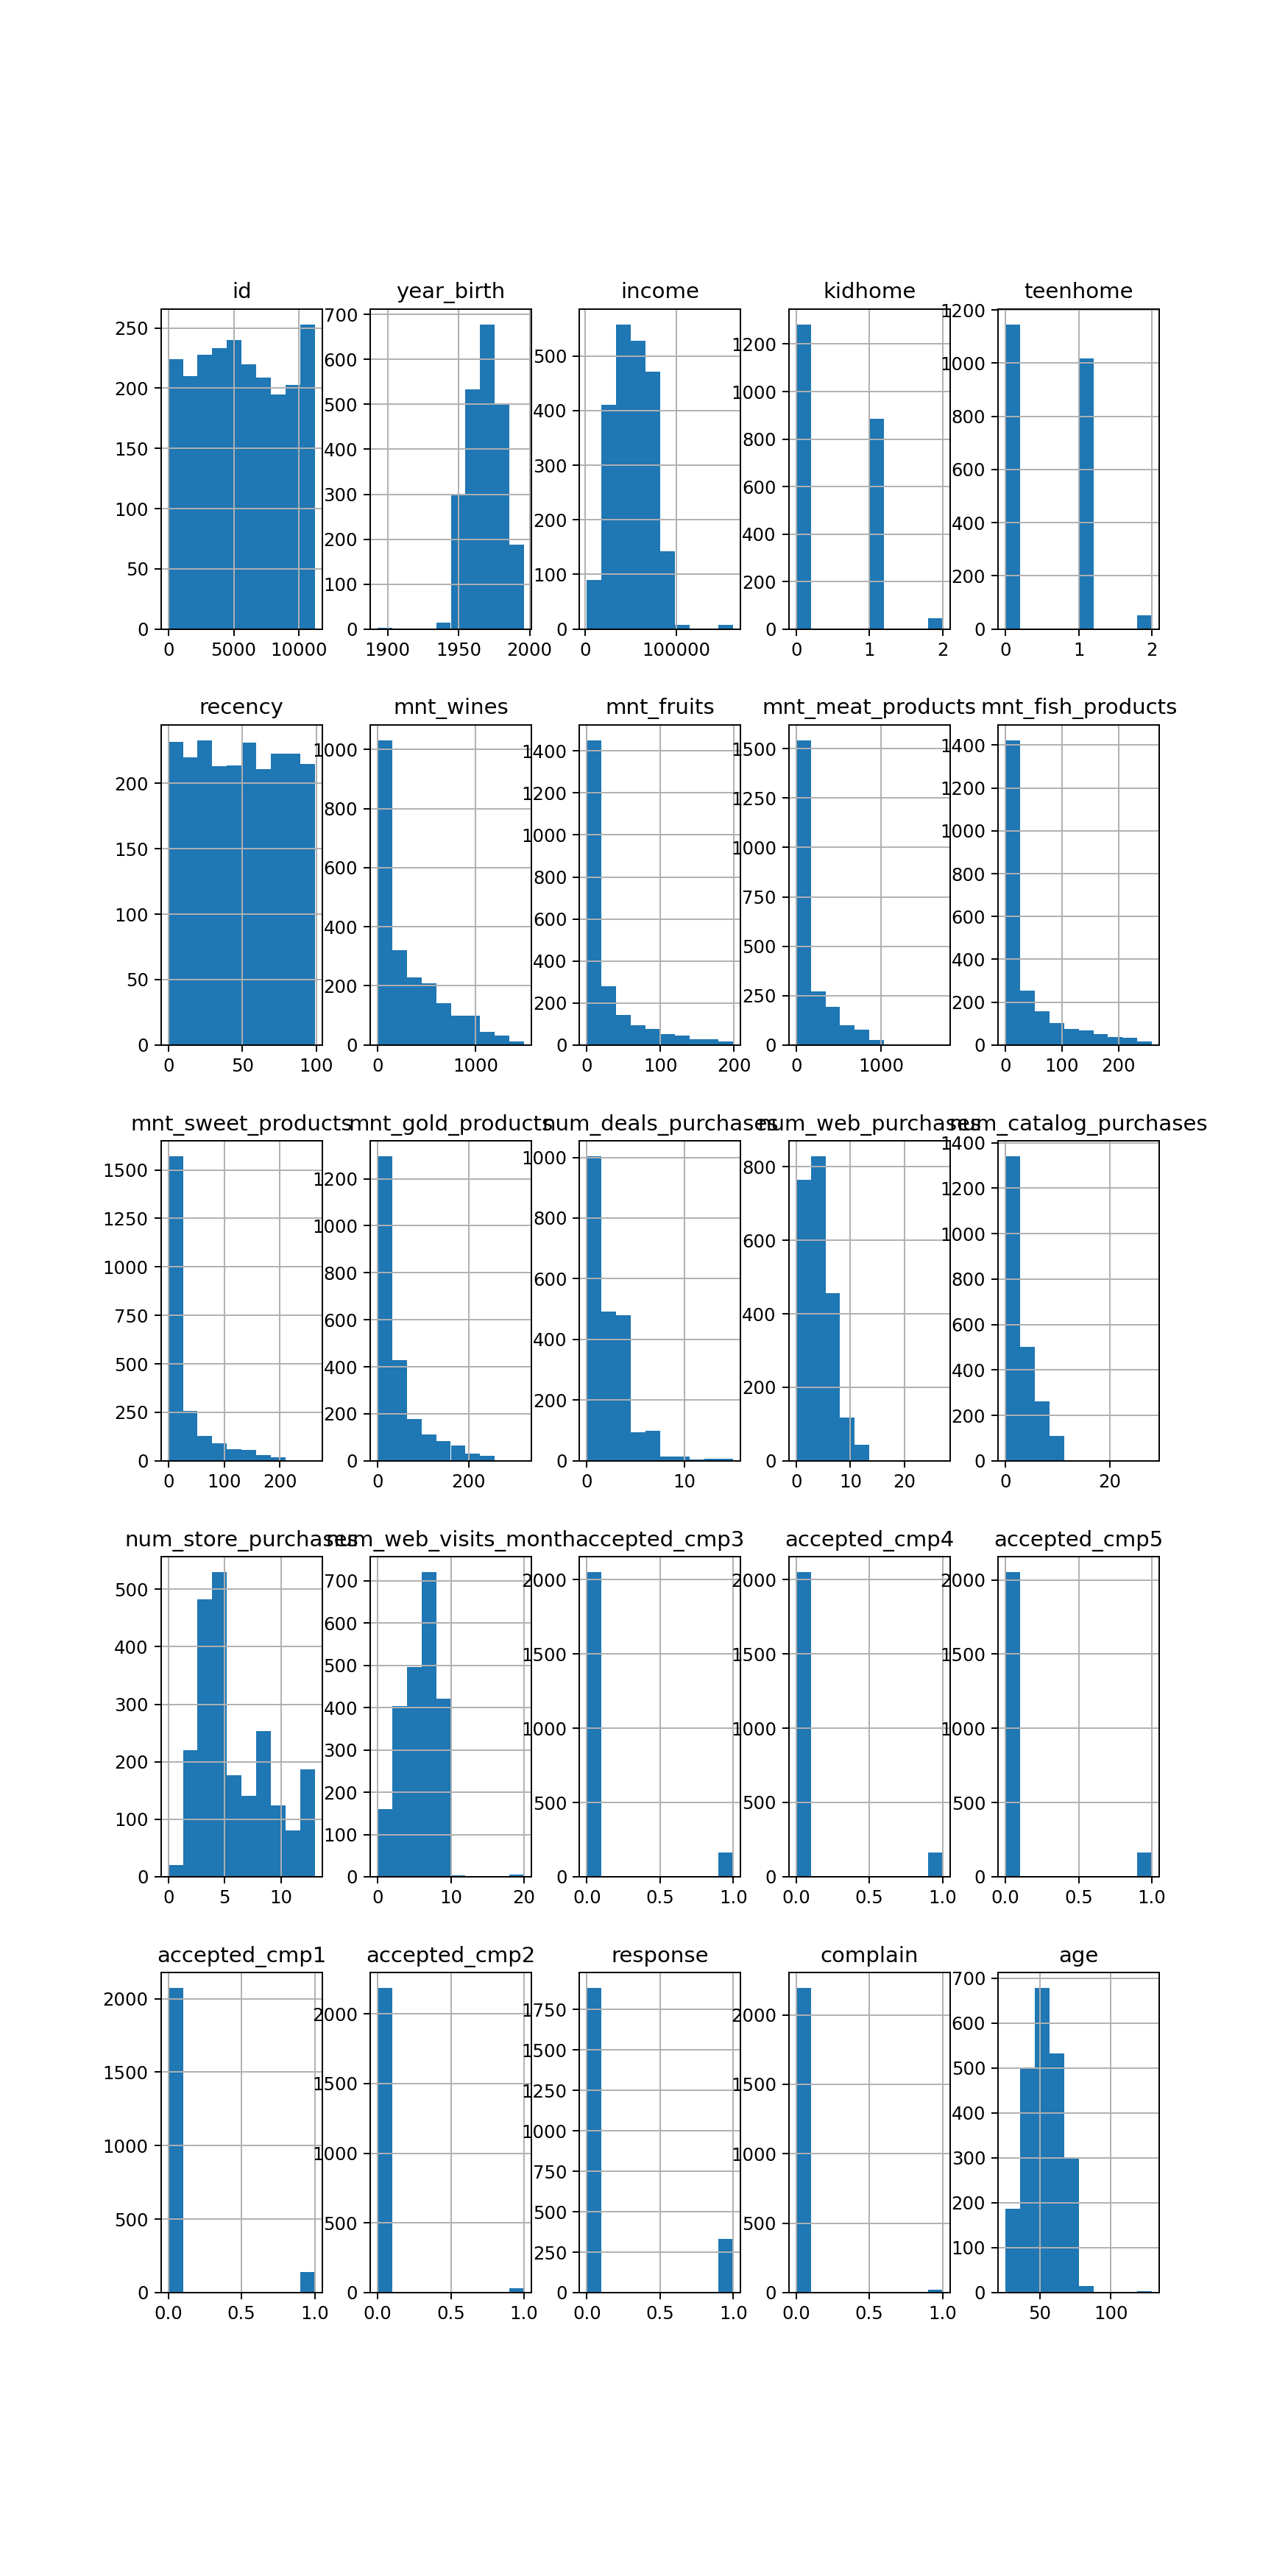

C:\Users\user\AppData\Local\Temp/ipykernel_20816/444885302.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  marketing_data.hist(ax = ax);


In [353]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

In [354]:
#First, let's find a correlation, so all variables are numerical
marketing_data.corr()

id  year_birth    income   kidhome  teenhome  \
id                     1.000000    0.001991  0.000064  0.001181 -0.002535   
year_birth             0.001991    1.000000 -0.198064  0.233376 -0.350609   
income                 0.000064   -0.198064  1.000000 -0.514935  0.034363   
kidhome                0.001181    0.233376 -0.514935  1.000000 -0.039450   
teenhome              -0.002535   -0.350609  0.034363 -0.039450  1.000000   
recency               -0.043918   -0.016023  0.006945  0.011919  0.013466   
mnt_wines             -0.020625   -0.159225  0.688269 -0.497132  0.003380   
mnt_fruits             0.007495   -0.017653  0.507959 -0.373350 -0.176726   
mnt_meat_products     -0.005550   -0.033499  0.692465 -0.439100 -0.261478   
mnt_fish_products     -0.023712   -0.040265  0.520351 -0.388751 -0.205523   
mnt_sweet_products    -0.005600   -0.020013  0.523746 -0.377855 -0.163368   
mnt_gold_products     -0.010847   -0.064030  0.389204 -0.354857 -0.020152   
num_deals_purchases   -0.041097   -0.058953 -0.108457  0.216594  0.386754   
num_web_purchases     -0.018271   -0.152951  0.458812 -0.371895  0.161948   
num_catalog_purchases -0.001970   -0.121610  0.696541 -0.504393 -0.112962   
num_store_purchases   -0.012615   -0.127660  0.630397 -0.501151  0.049393   
num_web_visits_month  -0.007946    0.123833 -0.650564  0.447462  0.131386   
accepted_cmp3         -0.035751    0.061878 -0.015286  0.016203 -0.042649   
accepted_cmp4         -0.023790   -0.066030  0.219337 -0.161936  0.038265   
accepted_cmp5         -0.006917    0.010663  0.396571 -0.205227 -0.190950   
accepted_cmp1         -0.018085   -0.009531  0.327167 -0.174085 -0.144996   
accepted_cmp2         -0.014936   -0.006682  0.103909 -0.081833 -0.015573   
response              -0.021273    0.023825  0.161049 -0.077733 -0.154114   
complain               0.034217   -0.030380 -0.030583  0.041034  0.003267   
age                   -0.001991   -1.000000  0.198064 -0.233376  0.350609   

                        recency  mnt_wines  mnt_fruits  mnt_meat_products  \
id                    -0.043918  -0.020625    0.007495          -0.005550   
year_birth            -0.016023  -0.159225   -0.017653          -0.033499   
income                 0.006945   0.688269    0.507959           0.692465   
kidhome                0.011919  -0.497132   -0.373350          -0.439100   
teenhome               0.013466   0.003380   -0.176726          -0.261478   
recency                1.000000   0.015370   -0.005971           0.022254   
mnt_wines              0.015370   1.000000    0.386977           0.568752   
mnt_fruits            -0.005971   0.386977    1.000000           0.547796   
mnt_meat_products      0.022254   0.568752    0.547796           1.000000   
mnt_fish_products      0.000331   0.397602    0.593407           0.573507   
mnt_sweet_products     0.024859   0.390178    0.571581           0.535048   
mnt_gold_products      0.017417   0.392588    0.396443           0.359328   
num_deals_purchases    0.002470   0.009235   -0.134416          -0.121079   
num_web_purchases     -0.005803   0.553745    0.302001           0.307013   
num_catalog_purchases  0.023856   0.634684    0.486229           0.734082   
num_store_purchases   -0.000784   0.639889    0.458457           0.485877   
num_web_visits_month  -0.018453  -0.321928   -0.418706          -0.539464   
accepted_cmp3         -0.032378   0.061363    0.014385           0.018356   
accepted_cmp4          0.017455   0.373103    0.006356           0.091544   
accepted_cmp5         -0.000596   0.473530    0.212840           0.376827   
accepted_cmp1         -0.021172   0.351380    0.191786           0.313034   
accepted_cmp2         -0.001448   0.206175   -0.009997           0.043491   
response              -0.199981   0.246185    0.122391           0.237653   
complain               0.013599  -0.039516   -0.005338          -0.023814   
age                    0.016023   0.159225    0.017653           0.033499   

                       

<IPython.core.display.Javascript object>


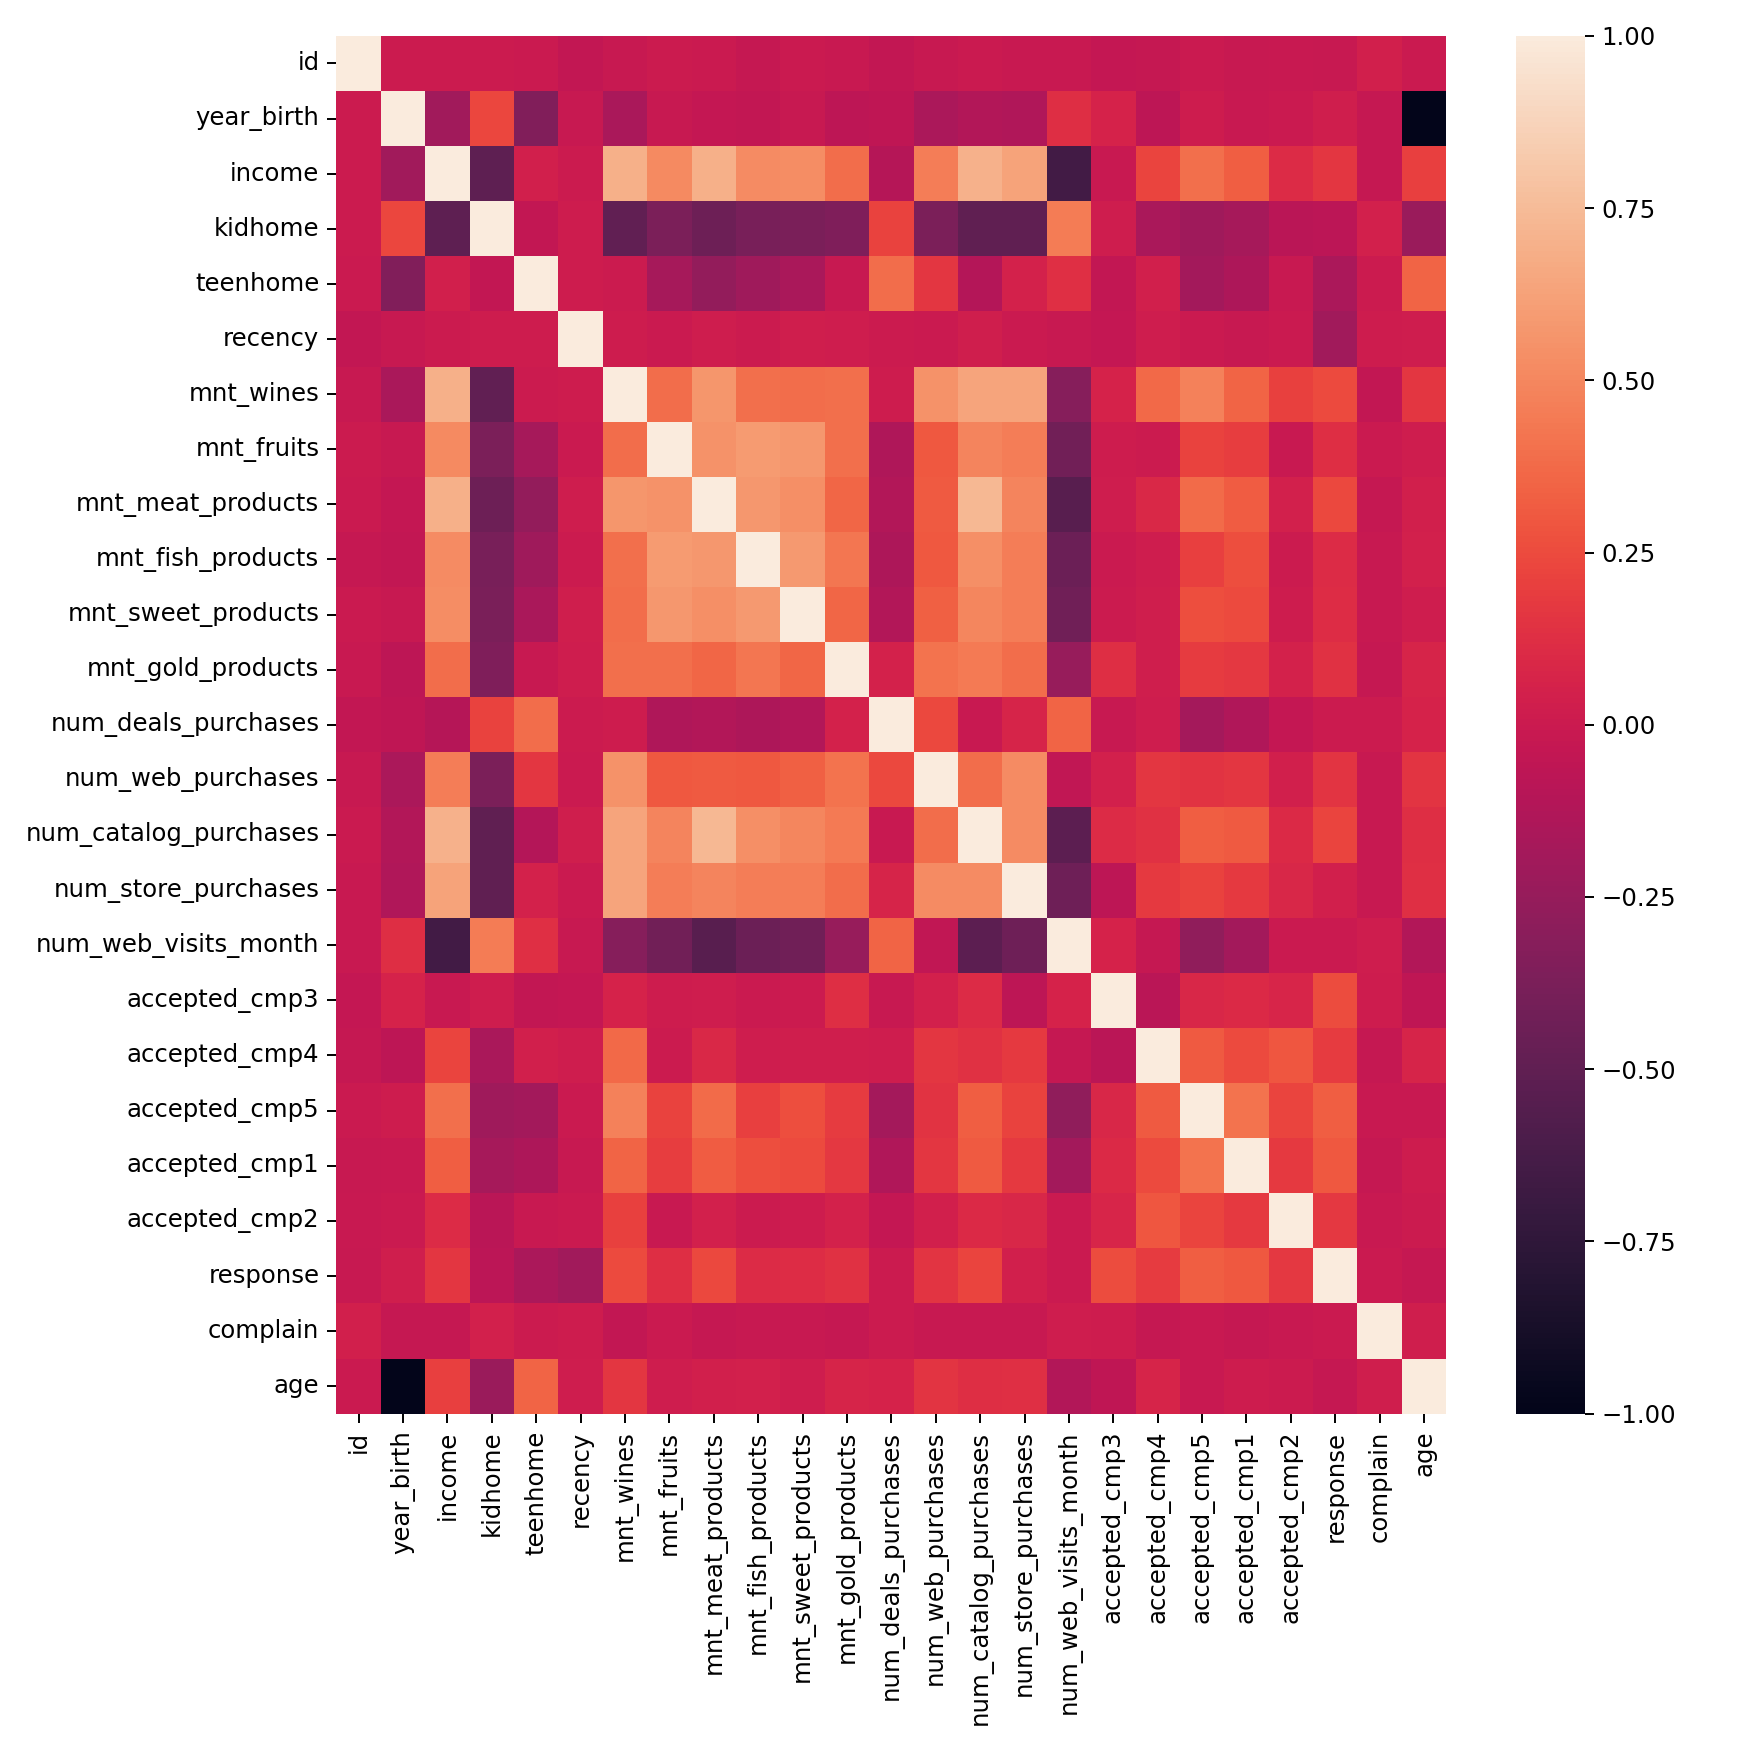

In [355]:
plt.figure(figsize=(10,10))
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()

#### Observations:
Om the heat map we can spot bright blocks: number of purchases and income, amount of products and income. 
Let's look at the correlation table.
* Number of in-store purchases is positively correlated with income (+0.63)
* Number of catalog purchases is positively correlated with income, amount of wine and meat bought.
* On the contrary, number of web page visits is the least correlated with income (-0.65)
* Amount of meat products bought is positively correlated with income (+0.69)

Products-complements (with positive correlation) are:
* Meat and wine, fruit,  fish
* Fish and wine, fruit, meat
* Sweet and fruit, meat, fish
* Gold and fish

It can be used to create speccial offers/discounts and encourage people buy more.

### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

Scatterplot can effectively illustrate the distribution of purchase by income.

`for` loop can iterate through the list of columns.

`hue` parameter is used to show the education background.

<IPython.core.display.Javascript object>


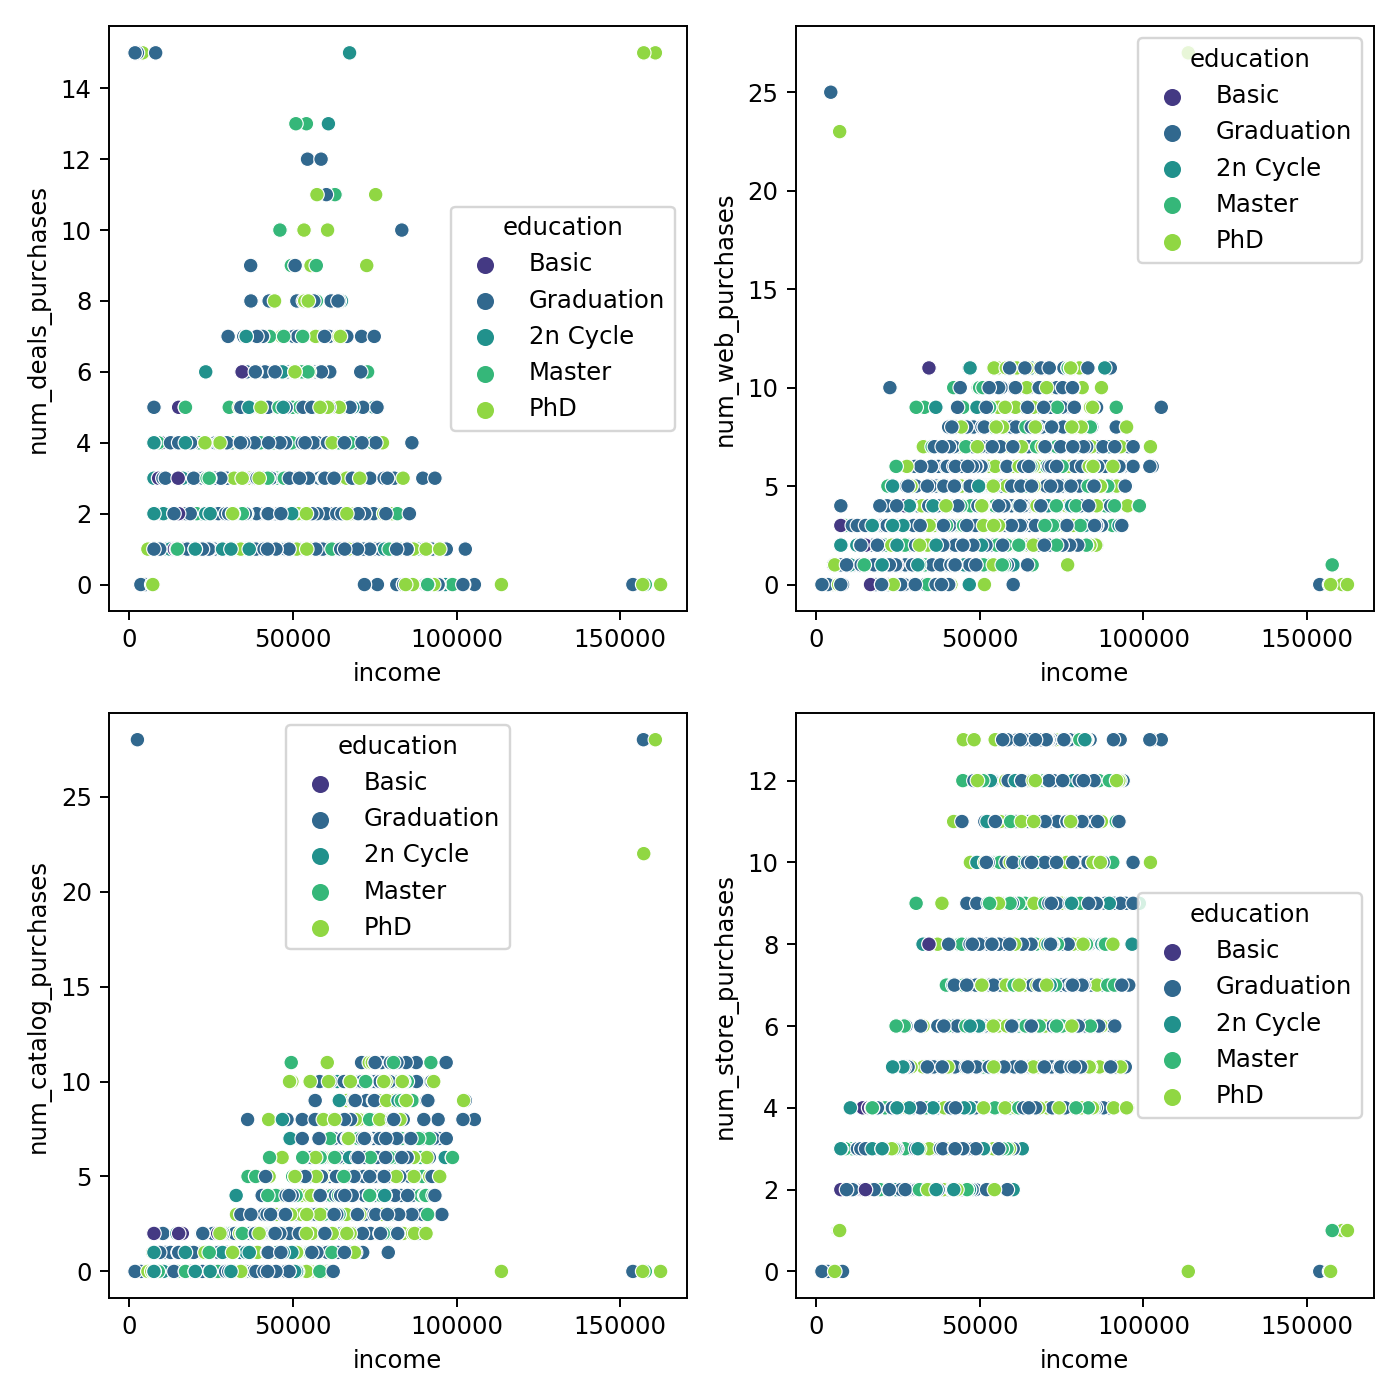

In [357]:
# num purchases columns list
num_purchases_cols = ['num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases']

fig = plt.figure(figsize = (8,8))
for i in range(len(num_purchases_cols)):
    ax = plt.subplot(2,2,i+1)
    sns.scatterplot(x= marketing_data['income'], 
                    y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data['education'], 
                    palette='viridis')
plt.tight_layout()

plt.show()

There is a positive linear relationship between `income` and the folowing:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`.

There is no obvious relationship between `income` and `num_deals_purchases`.
We cannot differenciate any patterns associated with `education`.

<IPython.core.display.Javascript object>


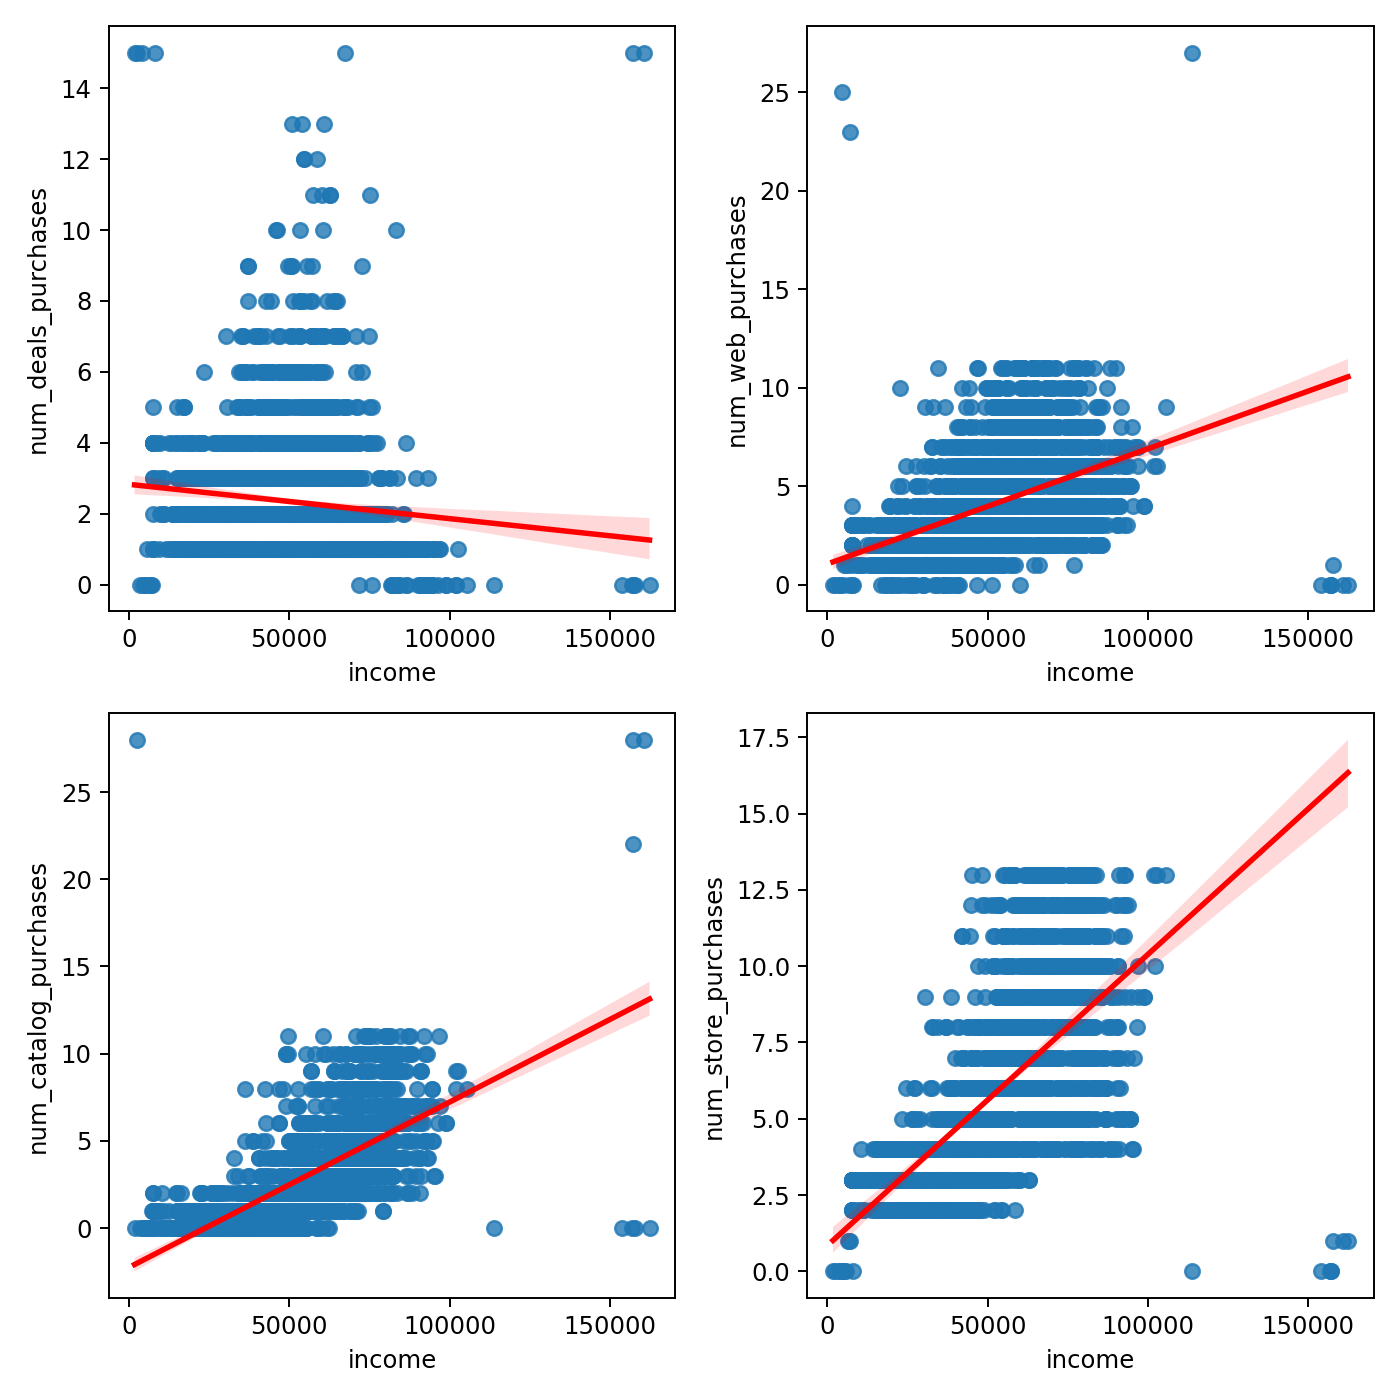

In [301]:
# num purchases columns list
num_purchases_cols = ['num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases']

fig = plt.figure(figsize = (8,8))
for i in range(len(num_purchases_cols)):
    
    ax = plt.subplot(2,2,i+1)
    sns.regplot(x= marketing_data['income'], 
                y= marketing_data[num_purchases_cols[i]], 
                line_kws={'color': 'red'})
plt.tight_layout()
plt.show()


With the help of `regplot` we can see the stronges positive linear relationship in num_store_purchases.
Next step is to find the `total amount of purchases` and its correlation with income and education .

In [359]:
marketing_data['total_purchases'] = marketing_data['num_deals_purchases'] + marketing_data['num_web_purchases'] + marketing_data['num_catalog_purchases'] + marketing_data['num_store_purchases']

C:\Users\user\AppData\Local\Temp/ipykernel_20816/2052688831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['total_purchases'] = marketing_data['num_deals_purchases'] + marketing_data['num_web_purchases'] + marketing_data['num_catalog_purchases'] + marketing_data['num_store_purchases']


<IPython.core.display.Javascript object>


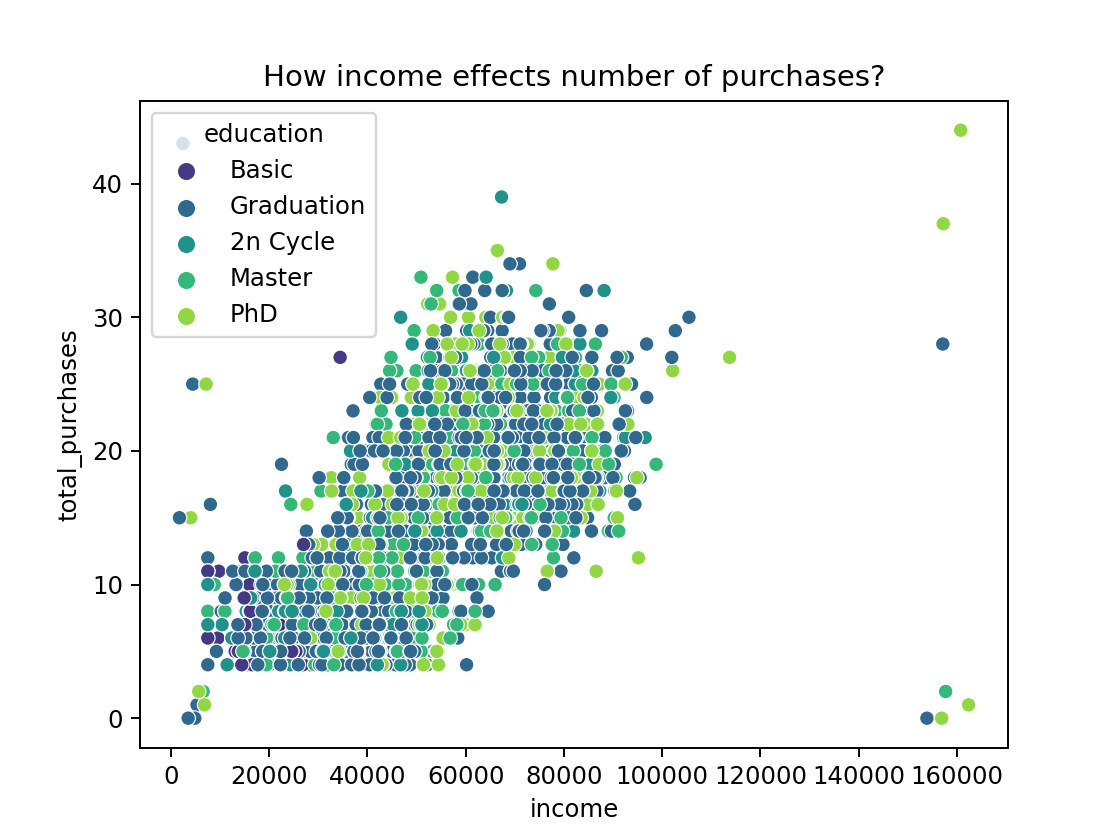

In [360]:
plt.figure()
sns.scatterplot(y= marketing_data['total_purchases'], 
                x=marketing_data['income'], 
                hue = marketing_data['education'], 
                palette='viridis')
plt.title('How income effects number of purchases?')
plt.show()

<IPython.core.display.Javascript object>


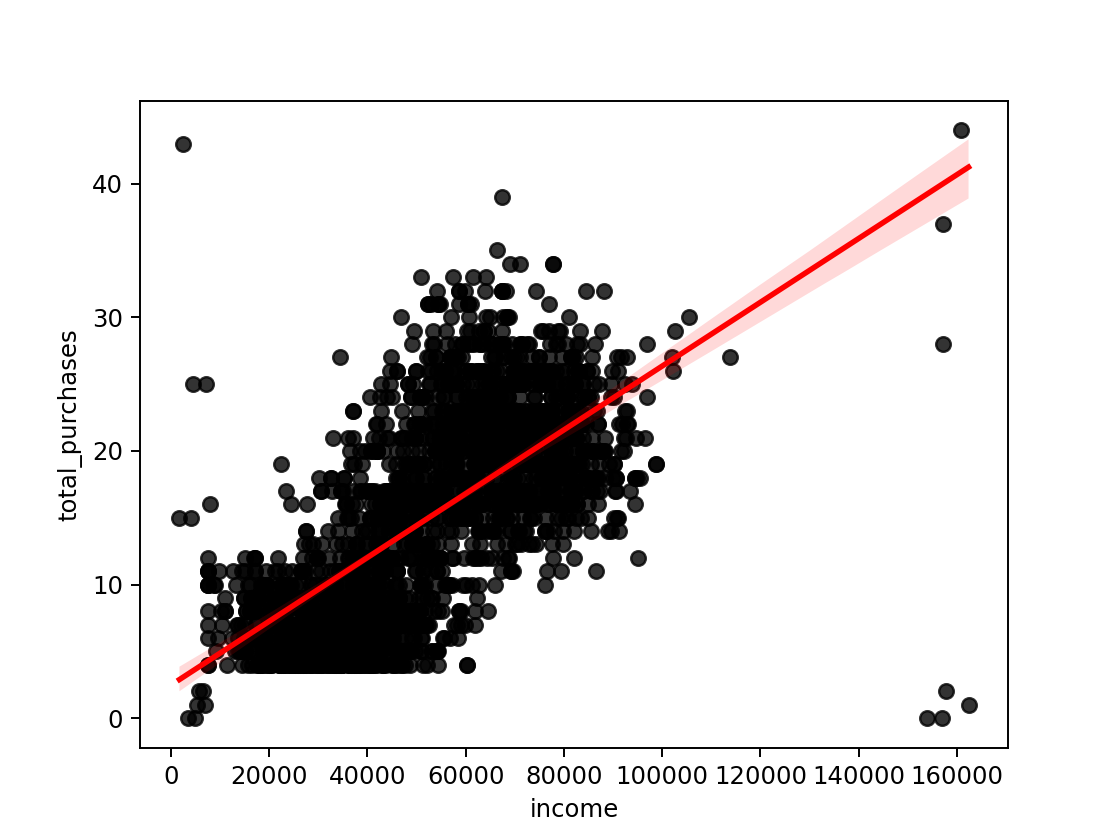

In [361]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data['total_purchases'], x=marketing_data['income'], 
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.show()

There is a strong positive linear relationship between `purchases` and `income`.
The relationship with `education` is hard to decipher. The education levels are randomly scattered.

<IPython.core.display.Javascript object>


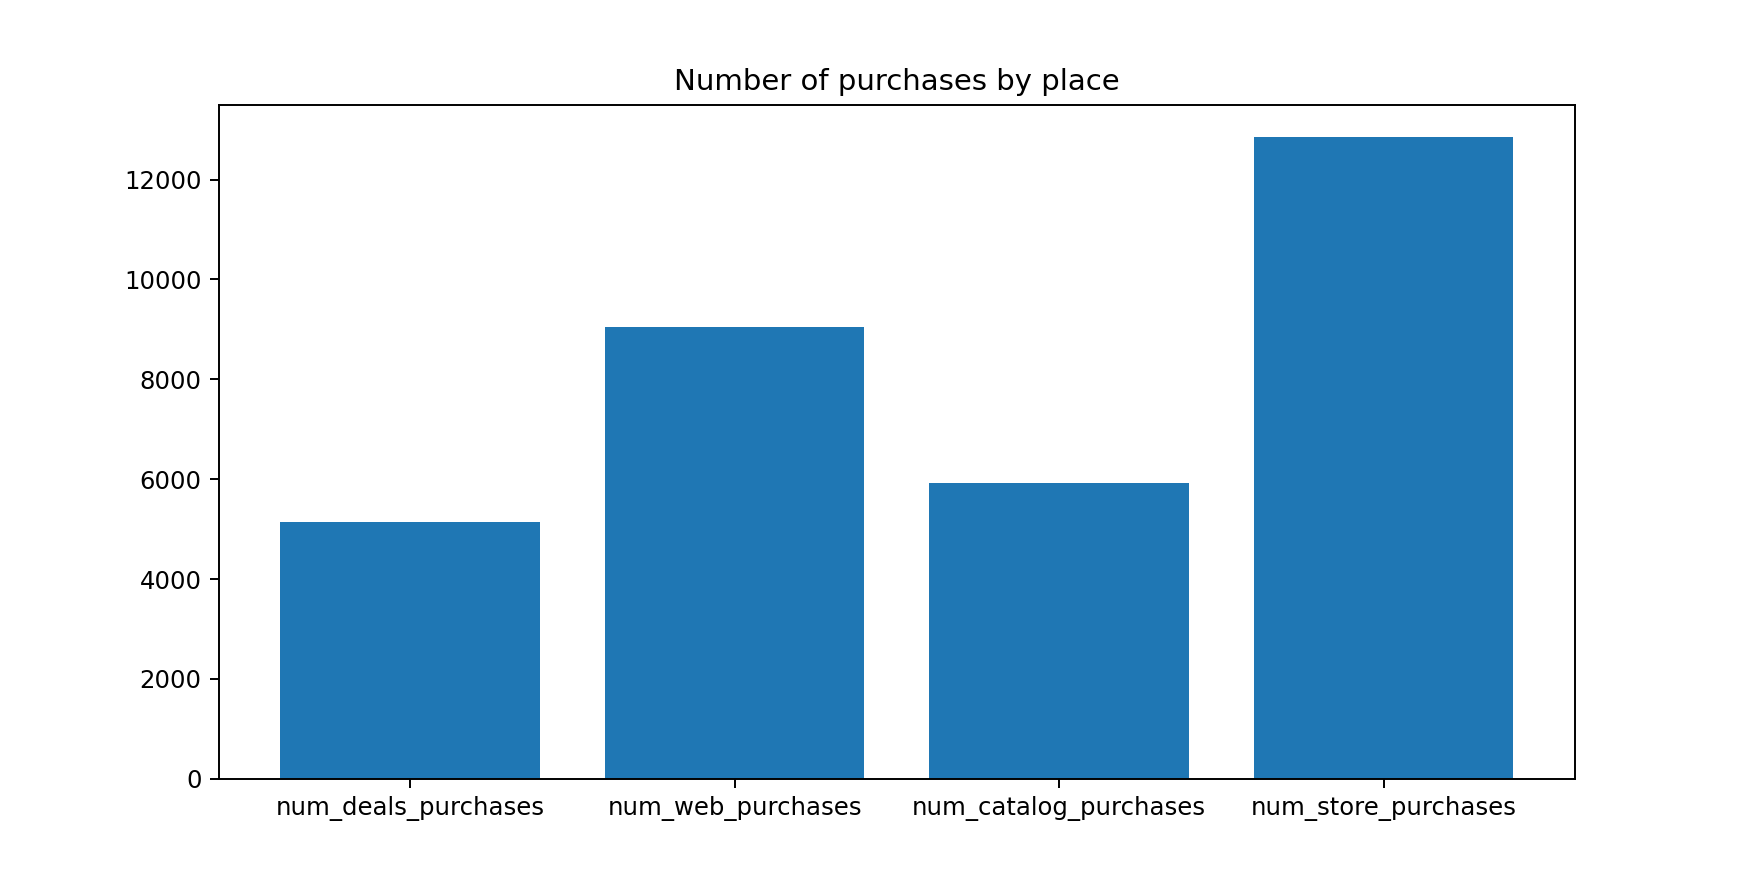

In [362]:
fig = plt.figure(figsize=(10,5))

plt.bar(x = ['num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases'], height = marketing_data[['num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases']].sum())
plt.title('Number of purchases by place')
plt.show()

#### Observations
Store is the most popular place, web purchases are on the second place.

Our marketing team could use this information to:
* attract potential customers to our website (better UI/UX experience or more ads on other pages)
* offer more deals for our web page visitors (banners of email subscriptions)
* and encourage people to go to the store after web page (sales days/ special offers)
* more work with catalog needed to be done in order to increase this channel of distribution.

### More Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_*_purchases`, this analysis will be looking at the relationship between `income` and `mnt_*_products`. The steps for this analysis will essentially be the same.


<IPython.core.display.Javascript object>


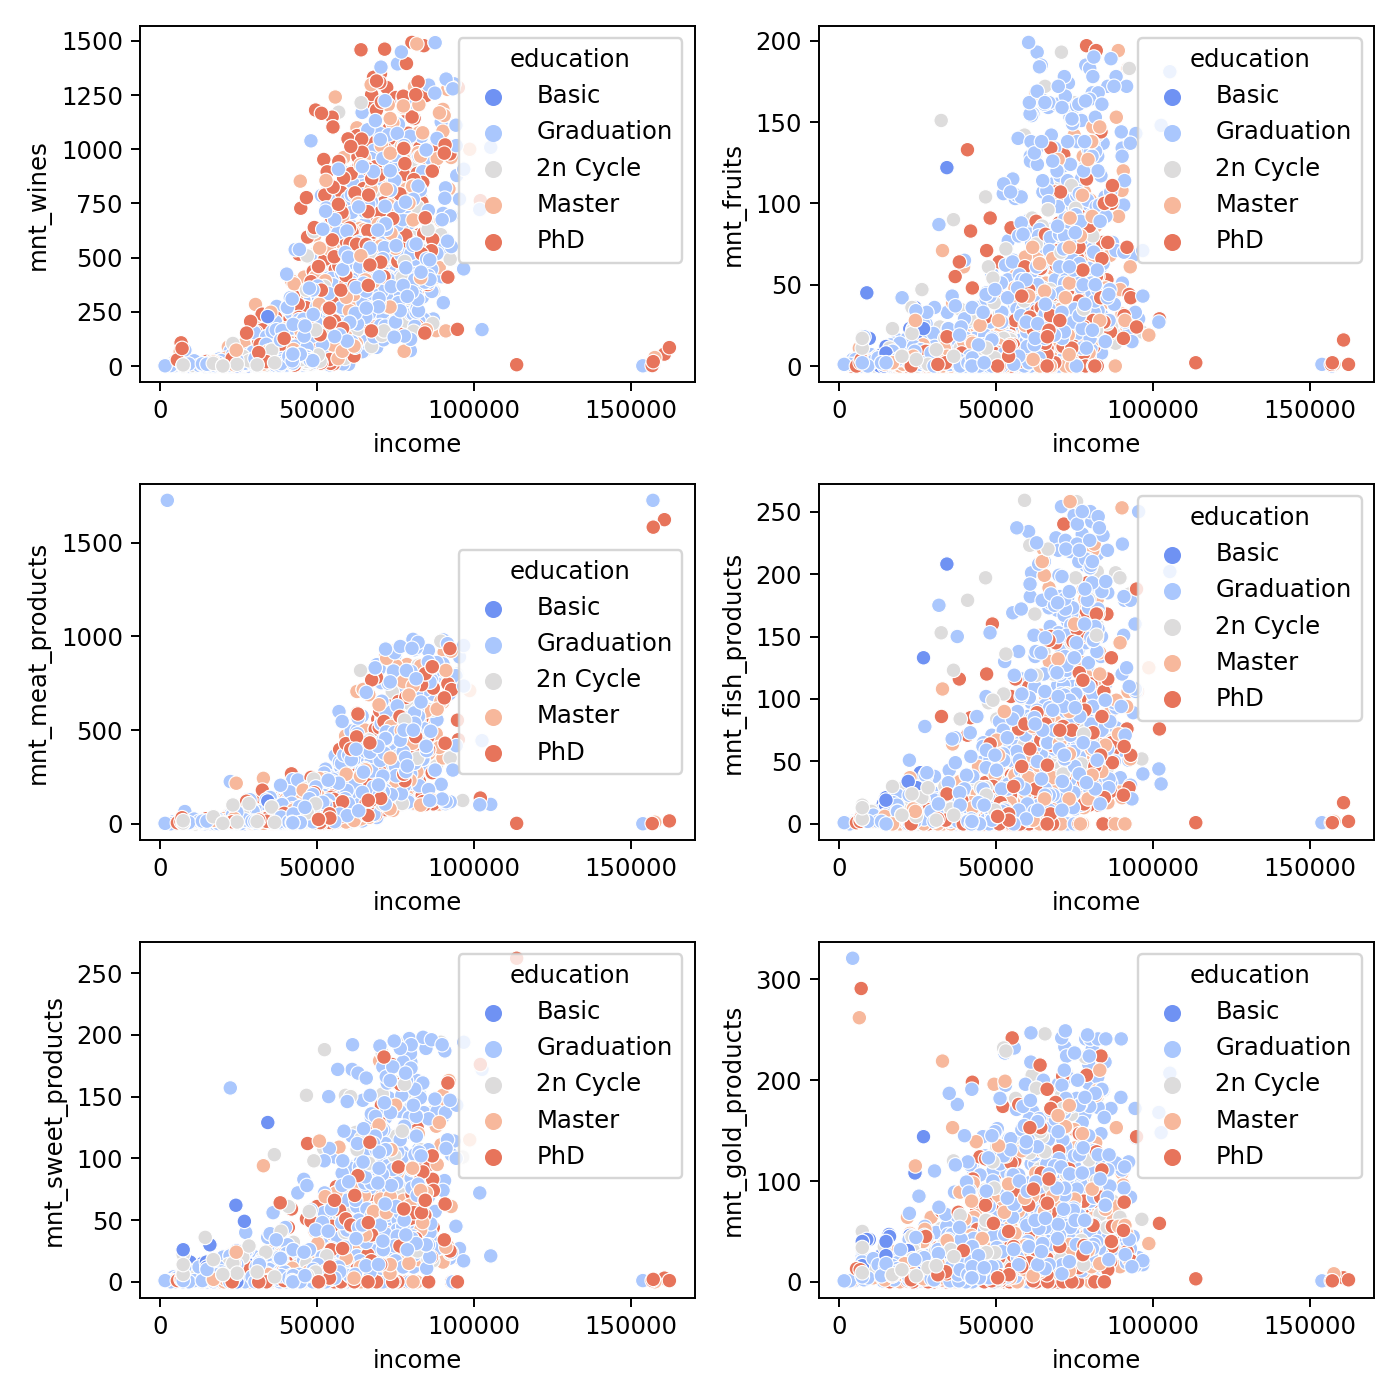

In [363]:
mnt_list = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']
fig = plt.figure(figsize=(8,8))
# for loop to go through length of amounts list
for i in range(len(mnt_list)):
    ax = plt.subplot(3,2, i+1)
    sns.scatterplot(y=marketing_data[mnt_list[i]], x=marketing_data['income'], hue= marketing_data['education'], palette='coolwarm')
plt.tight_layout()
plt.show()

#### Observations
There is a strong positive linear relationship between amount of product bought and `income`.
Regardless of the shopper's educational level, there is a positive, linear relationship for each type of product.

### Purchasing Behavior by Age <a class="anchor" id="section3_4"></a>

The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_*_products` vs. `age`
* `num_*_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:

* 18 to 35
* 36 to 50
* 51 to 70
* 71 and Older

These categorical variables may give a more clear story.

In [364]:
def age_groups(age):
    if 18<= age <= 35:
        return '18 to 35'
    elif 36<= age <= 50:
        return '36 to 50'
    elif 51 <= age <= 70:
        return '51 to 70'
    else:
        return '71 and Older'
#applying age_group to the age column
marketing_data['age_group'] = marketing_data['age'].apply(age_groups)

C:\Users\user\AppData\Local\Temp/ipykernel_20816/1166464032.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['age_group'] = marketing_data['age'].apply(age_groups)


In [365]:
#orders categorical variable
correct_order = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']
marketing_data['age_group'] = pd.Categorical(marketing_data['age_group'], correct_order, ordered=True)

C:\Users\user\AppData\Local\Temp/ipykernel_20816/849837632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['age_group'] = pd.Categorical(marketing_data['age_group'], correct_order, ordered=True)


<IPython.core.display.Javascript object>


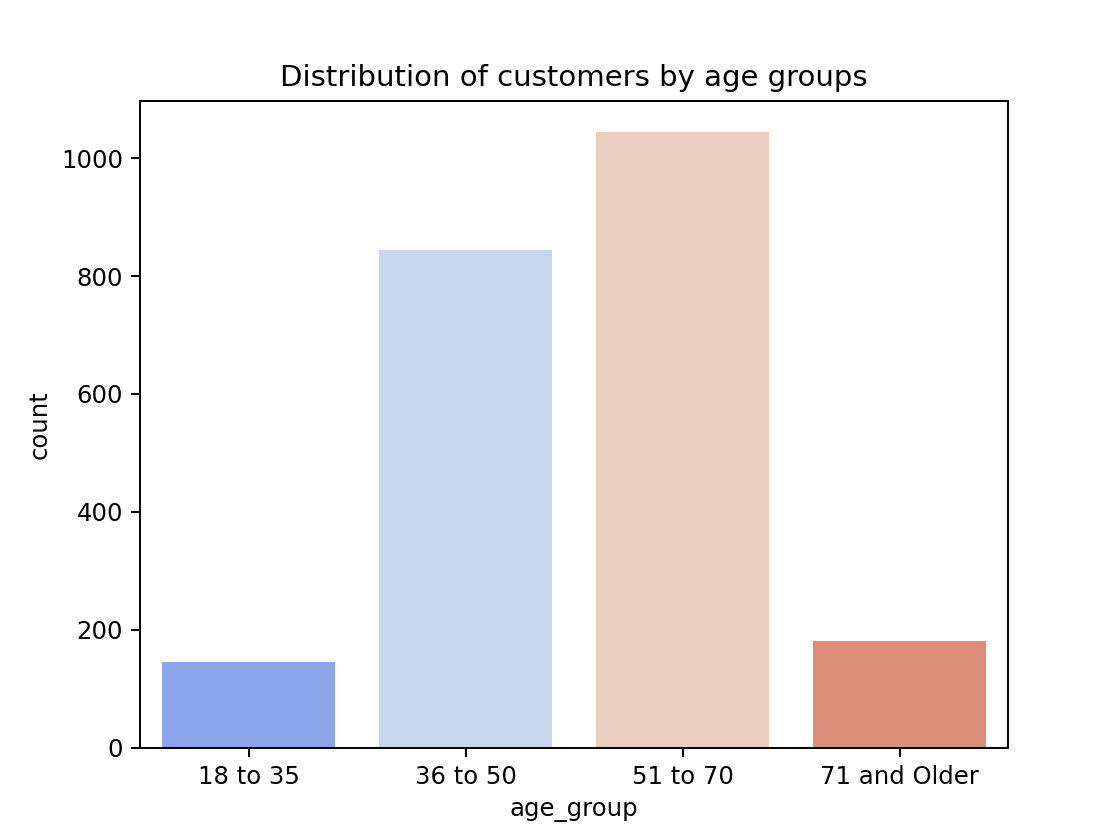

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [366]:
#plotting age groups in a bar chart
plt.figure()
sns.countplot(marketing_data['age_group'], palette = 'coolwarm')
plt.title('Distribution of customers by age groups')
plt.show()

The majority of customers are from 36 to 70 years old.
Let's illustrate the number of purchases vs age.

<IPython.core.display.Javascript object>


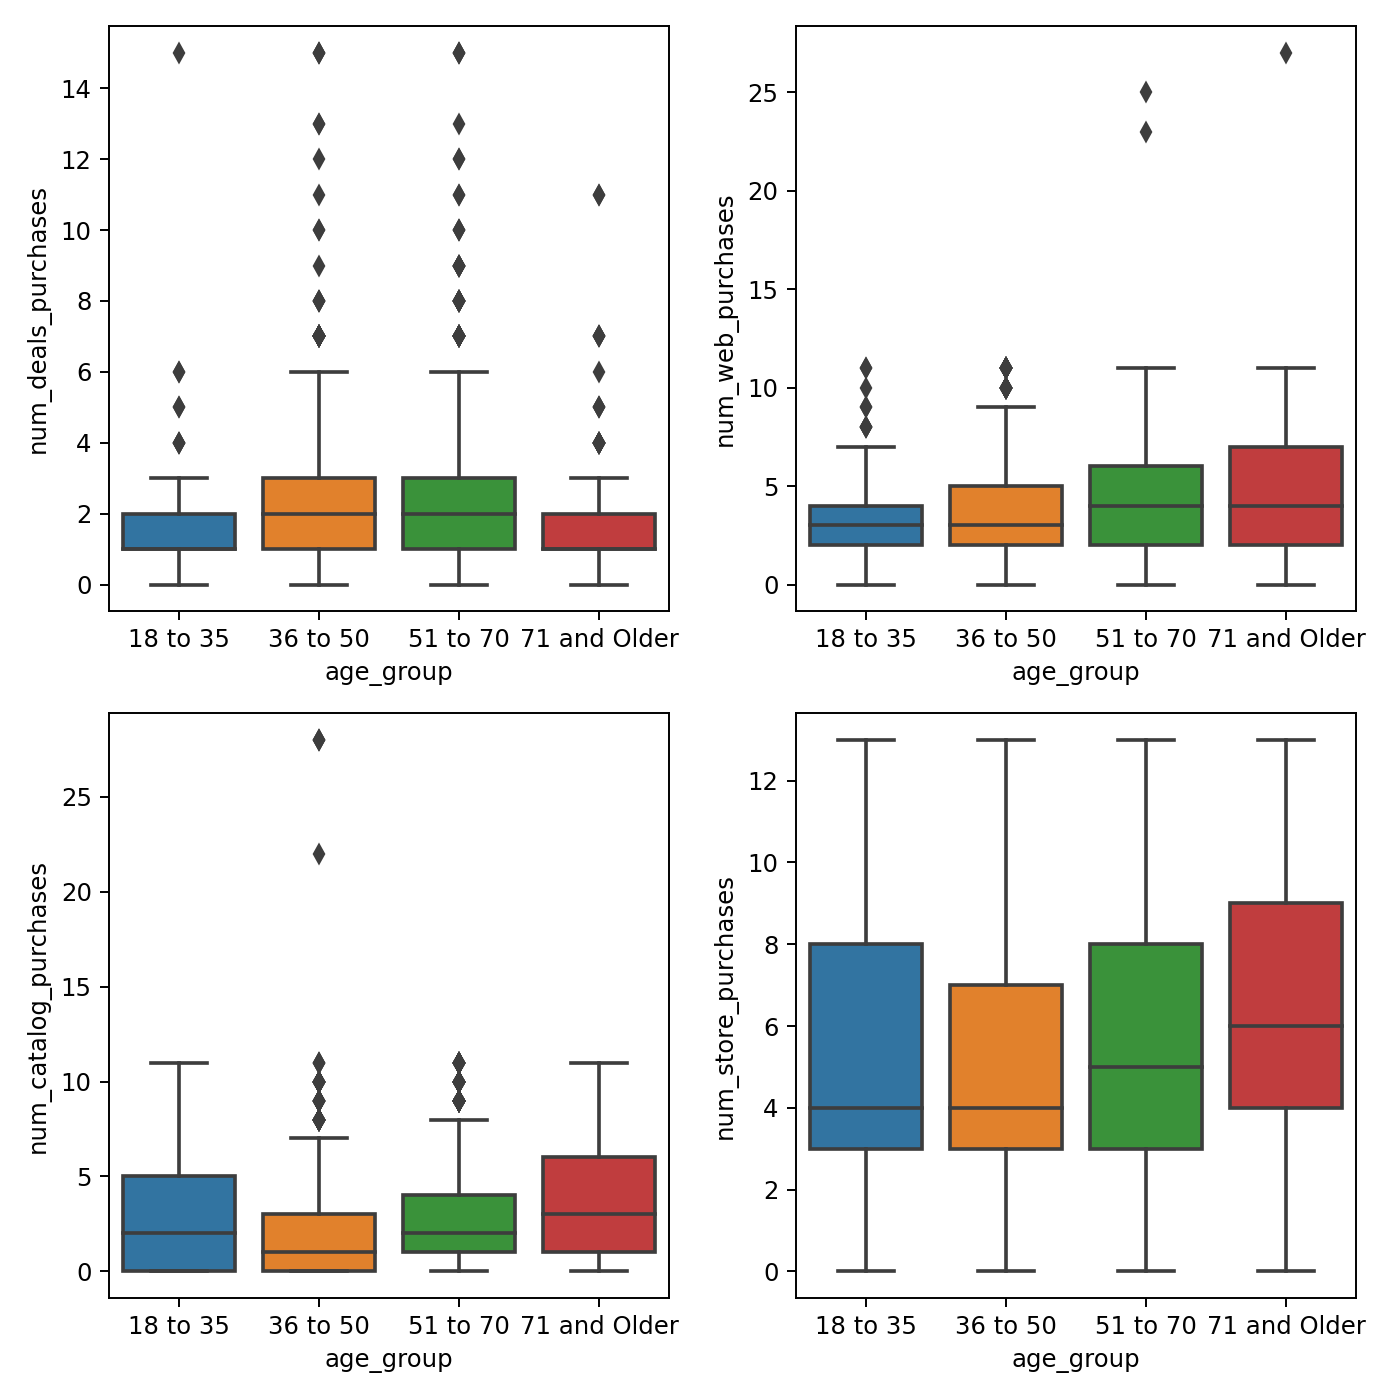

In [367]:
# num purchases columns list
num_purchases_cols = ['num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases']
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchases_cols)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = marketing_data['age_group'], y = marketing_data[num_purchases_cols[i]])
plt.tight_layout()
plt.show()

#### Observations
This chart yields some very interesting insights.
* `18 to 35` and `71 and older` age groups tend to be the least interested in deals.
* `36 to 50` and `51 to 70` age groups are interested in deals.

This information can help marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.
We need to use catalog and web page to increase  

Across the board, `age` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. 

The next analysis of interest is to see if `age_group` affects how many items customers buy each time.

<IPython.core.display.Javascript object>


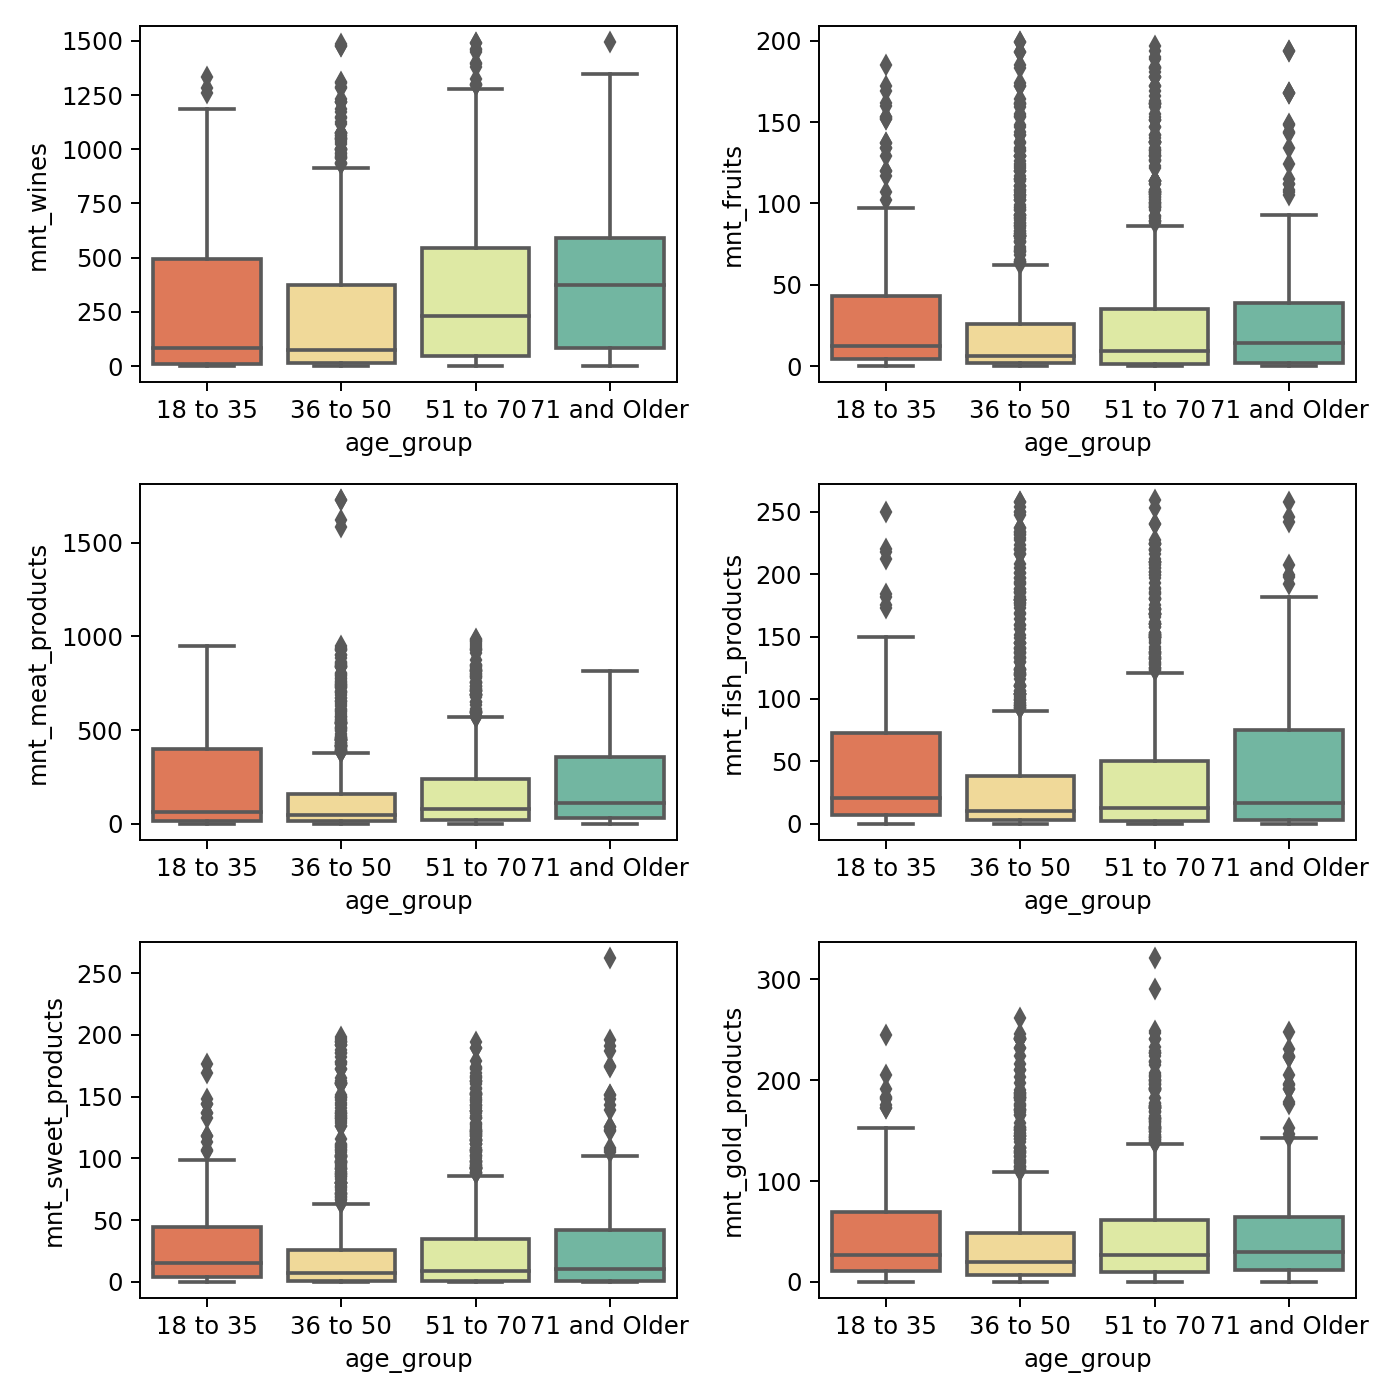

In [368]:
mnt_list = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']
fig = plt.figure(figsize=(8,8))
# for loop to go through length of amounts list
for i in range(len(mnt_list)):
    ax = plt.subplot(3,2, i+1)
    sns.boxplot(y=marketing_data[mnt_list[i]], 
                x=marketing_data['age_group'], 
                palette='Spectral')
plt.tight_layout()
plt.show()

#### Observations
* young people (18 to 35) are buying more sweets and fruit.
* older people (71 and Older) are buying more wines.
* middle age group is buying less meet and fish products than the others.

### Marketing campaign <a class="anchor" id="section3_5"></a>
#### How many people accepted each campaign? What are their age group?
The most recent campaign was the most successful, age groups of `36 to 50` and `51 to 70` were interested.
Marketing team can use this insight about the marketing campaign to replicate a more successful campaign.

<IPython.core.display.Javascript object>


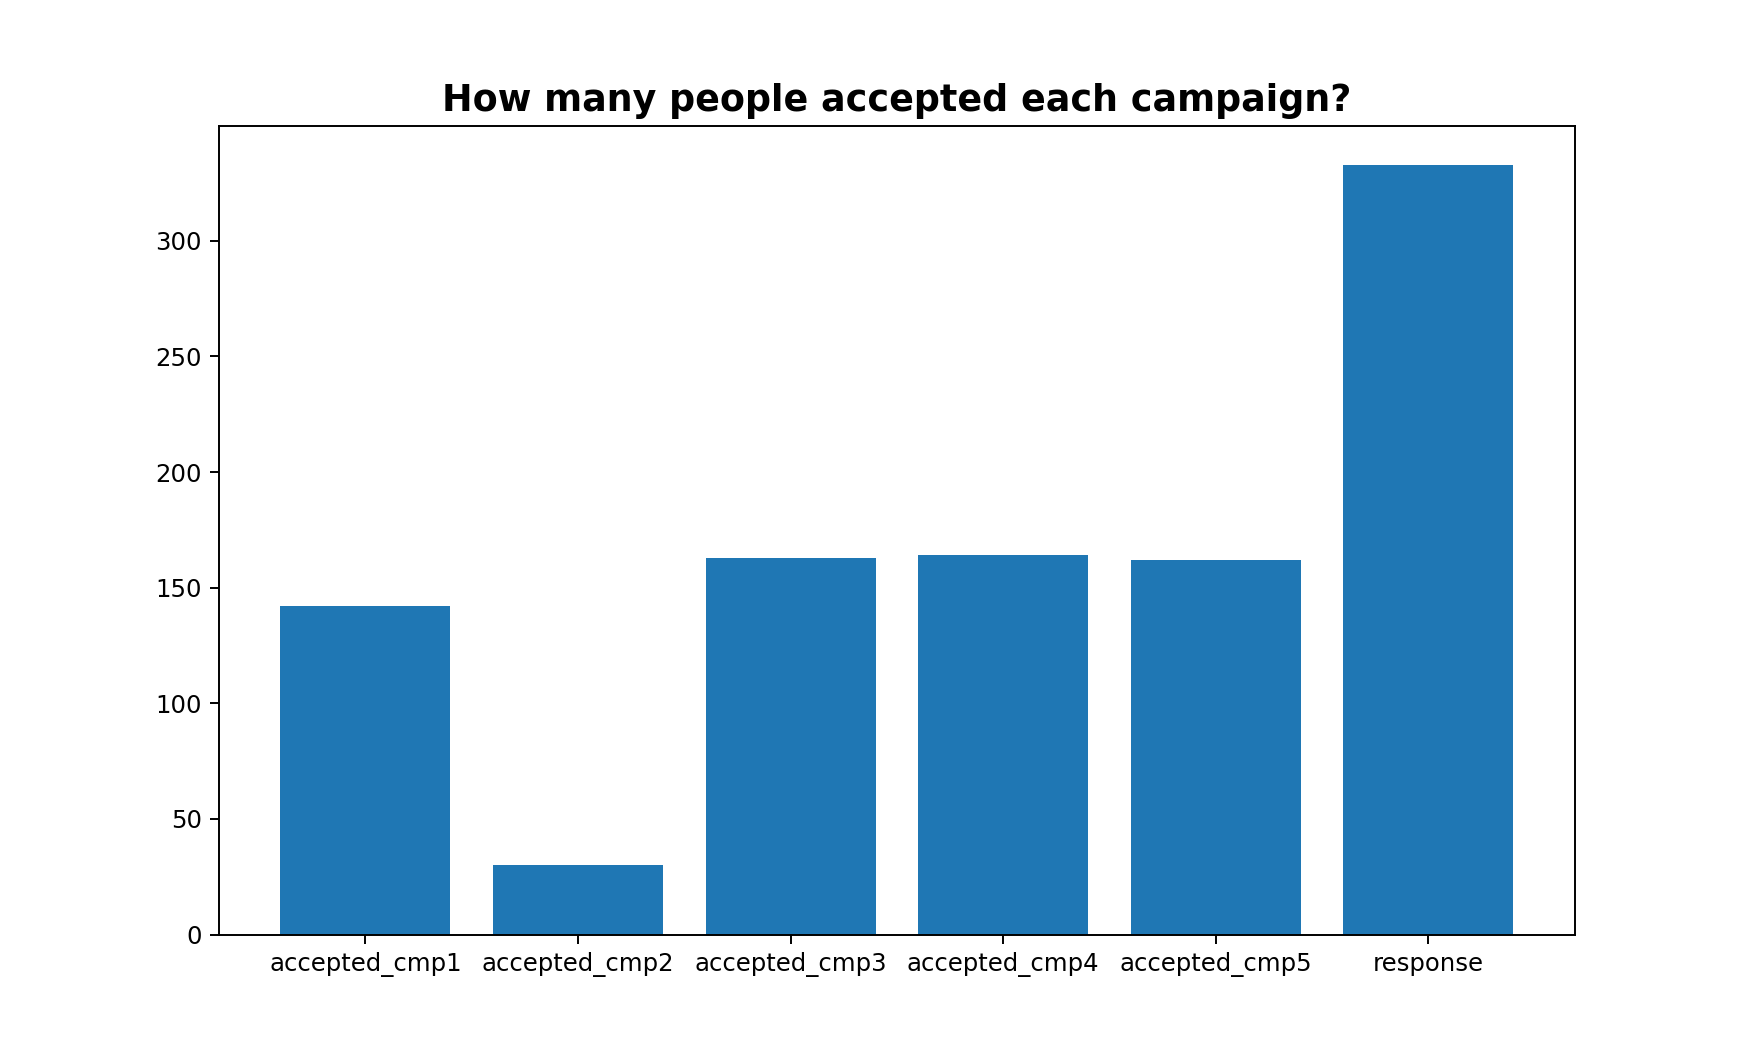

In [369]:
#list of all campaigns
campaign_list = ['accepted_cmp1', 'accepted_cmp2', 'accepted_cmp3', 'accepted_cmp4',
       'accepted_cmp5', 'response']
fig = plt.figure(figsize=(10,6))
plt.bar(x=campaign_list, height=marketing_data[campaign_list].sum())
plt.title("How many people accepted each campaign?", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

<IPython.core.display.Javascript object>


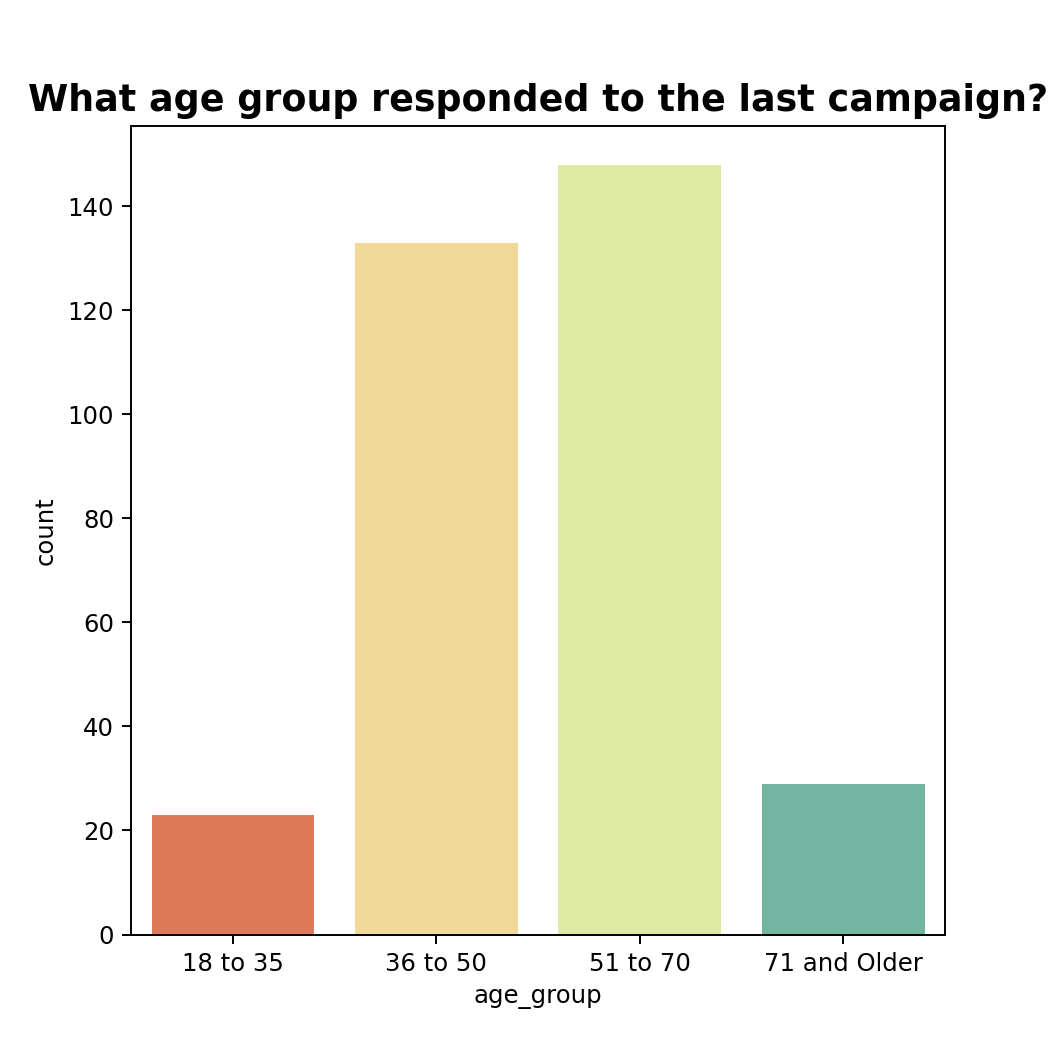

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [370]:
# new DataFrame of those, who responded to themost recent campaign
responded = marketing_data[marketing_data['response']==1]
plt.figure(figsize=(6,6))
sns.countplot(responded['age_group'], palette='Spectral')
plt.title('What age group responded to the last campaign?', fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

### Geography of our customers <a class="anchor" id="section3_6"></a>
As we can see, the majority of customers are from Spain.
there is no difference in total purchases made per customer between countries.
We need to pay attention to the insights from each country together with the proportion of customers from each country.
`Spanish` customers can affect our data, we need to make sure there is no crysis or seasonal holiday/trend going on in this country.
However, total purchases per customer in each country have similar distribution

In [371]:
marketing_data['country'].value_counts()

SP     1093
SA      336
CA      266
AUS     147
IND     147
GER     116
US      107
ME        3
Name: country, dtype: int64

<IPython.core.display.Javascript object>


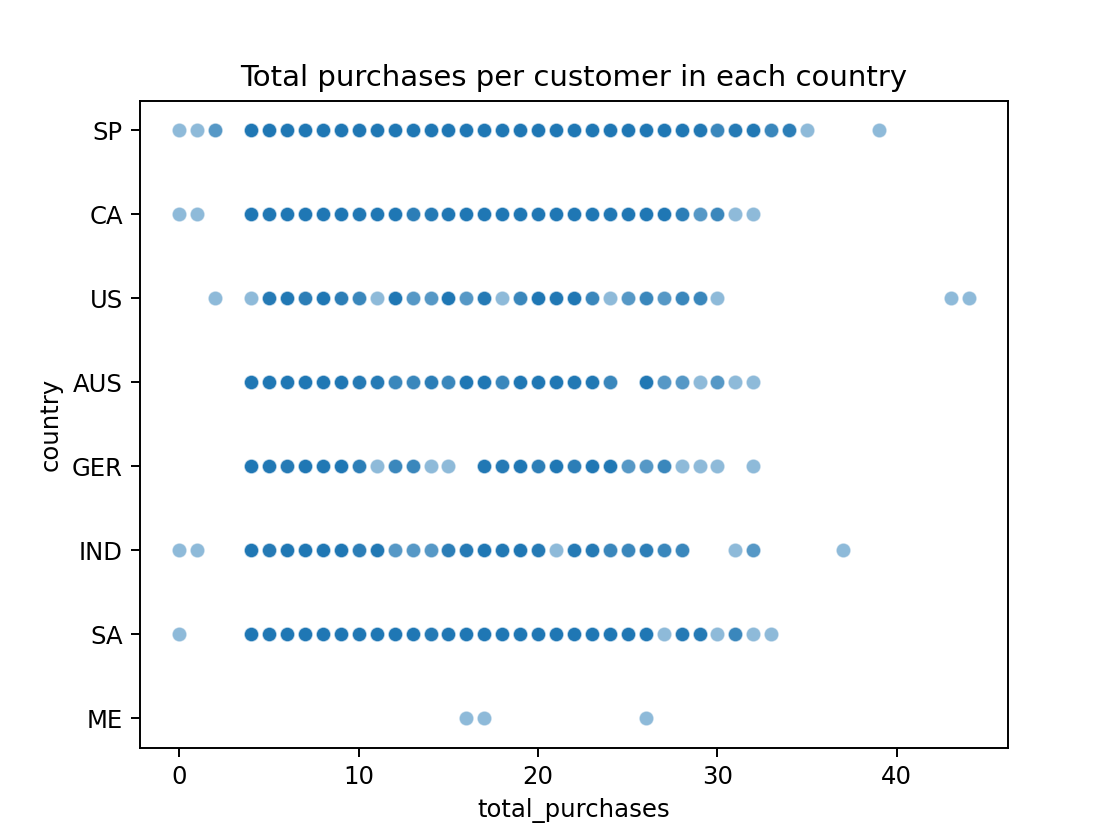

In [372]:
plt.figure()
# the distribution of total_purchases vs country
sns.scatterplot(x=marketing_data['total_purchases'], y=marketing_data['country'], alpha=0.5)
plt.title('Total purchases per customer in each country')
plt.show()

<IPython.core.display.Javascript object>


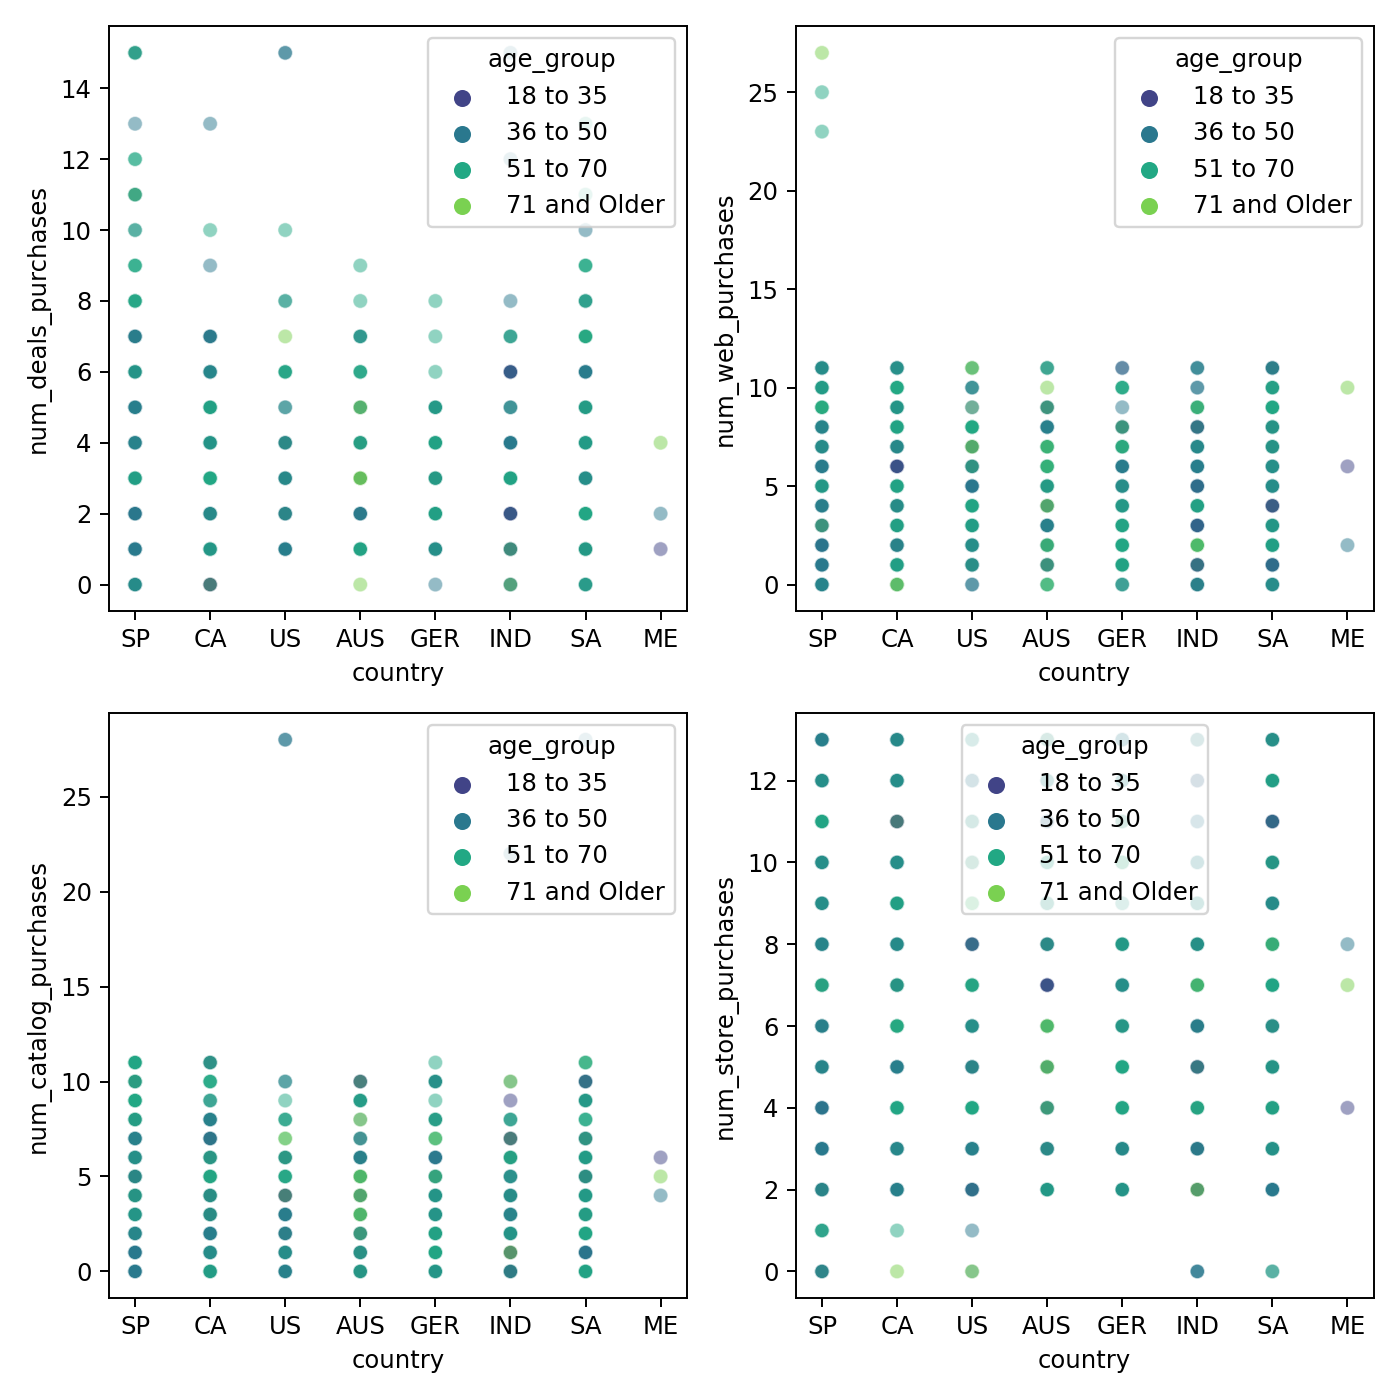

In [373]:
# num purchases columns list
num_purchases_cols = ['num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases']
# alpha parameter helps to see concentration
fig = plt.figure(figsize = (8,8))
for i in range(len(num_purchases_cols)):
    ax = plt.subplot(2,2,i+1)
    sns.scatterplot(x= marketing_data['country'], 
                    y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data['age_group'],
                    alpha = 0.5,
                    palette='viridis', )
plt.tight_layout()
plt.show()

#### Observations
Store purchases are the highest among all countries,
catalog purchases are the lowest.
The age distribution shows, that in Germany and Australia older generation is using catalogs.
Dependent on our goal, we can either look into what kind of products the people in catalogs are buying and improve marketing, increase inventory, or introduce more complements to increase sales. 

### Complains variable <a class="anchor" id="section3_7"></a>

Complains could affect reputation of the store and lead to the marketing campaign fail.
* Less than 1% of customers had a complain. It is a good sign.
* The majority of unsatisfied customers are from Spain. It is expected, as half of the customers are from Spain.

In [374]:
marketing_data['complain'].describe()

count    2215.000000
mean        0.009481
std         0.096929
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: complain, dtype: float64

<IPython.core.display.Javascript object>


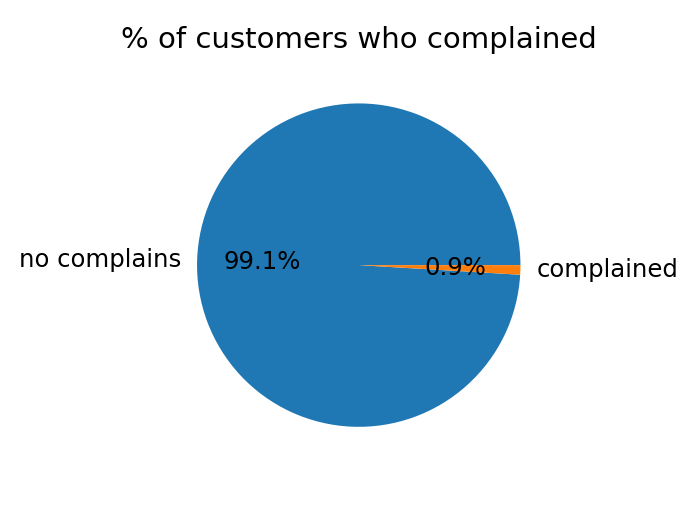

In [376]:
wedge_sizes = [2212-marketing_data['complain'].sum(), marketing_data['complain'].sum()]
labels = ['no complains', 'complained']
plt.figure(figsize = (4,3))
plt.pie(wedge_sizes, labels = labels, autopct='%1.1f%%')
plt.title('% of customers who complained')
plt.show()

In [377]:
#How many customers have complained
marketing_data['complain'].sum()

21

In [378]:
complained = marketing_data[marketing_data['complain'] == 1]

In [379]:
complained.country.value_counts()

SP     14
SA      3
CA      2
GER     1
IND     1
Name: country, dtype: int64

### Purchasing Behavior by country <a class="anchor" id="section3_8"></a> 
`boxplots` can effectively illustrate the distribution of amount bought by country.
`for` loop can iterate through the list of columns.

From the boxplots below, we can see that the total number of products a customer bought is similar in every country.

`ME` seems to shows better results in each category except fruit. But it is only because we have only 3 customers from that country. The sample is too small to make conclusions.

#### Country vs Income
Customers are making 50000 on average in every country from our dataset. Spain has the wighdest range of average income.

<IPython.core.display.Javascript object>


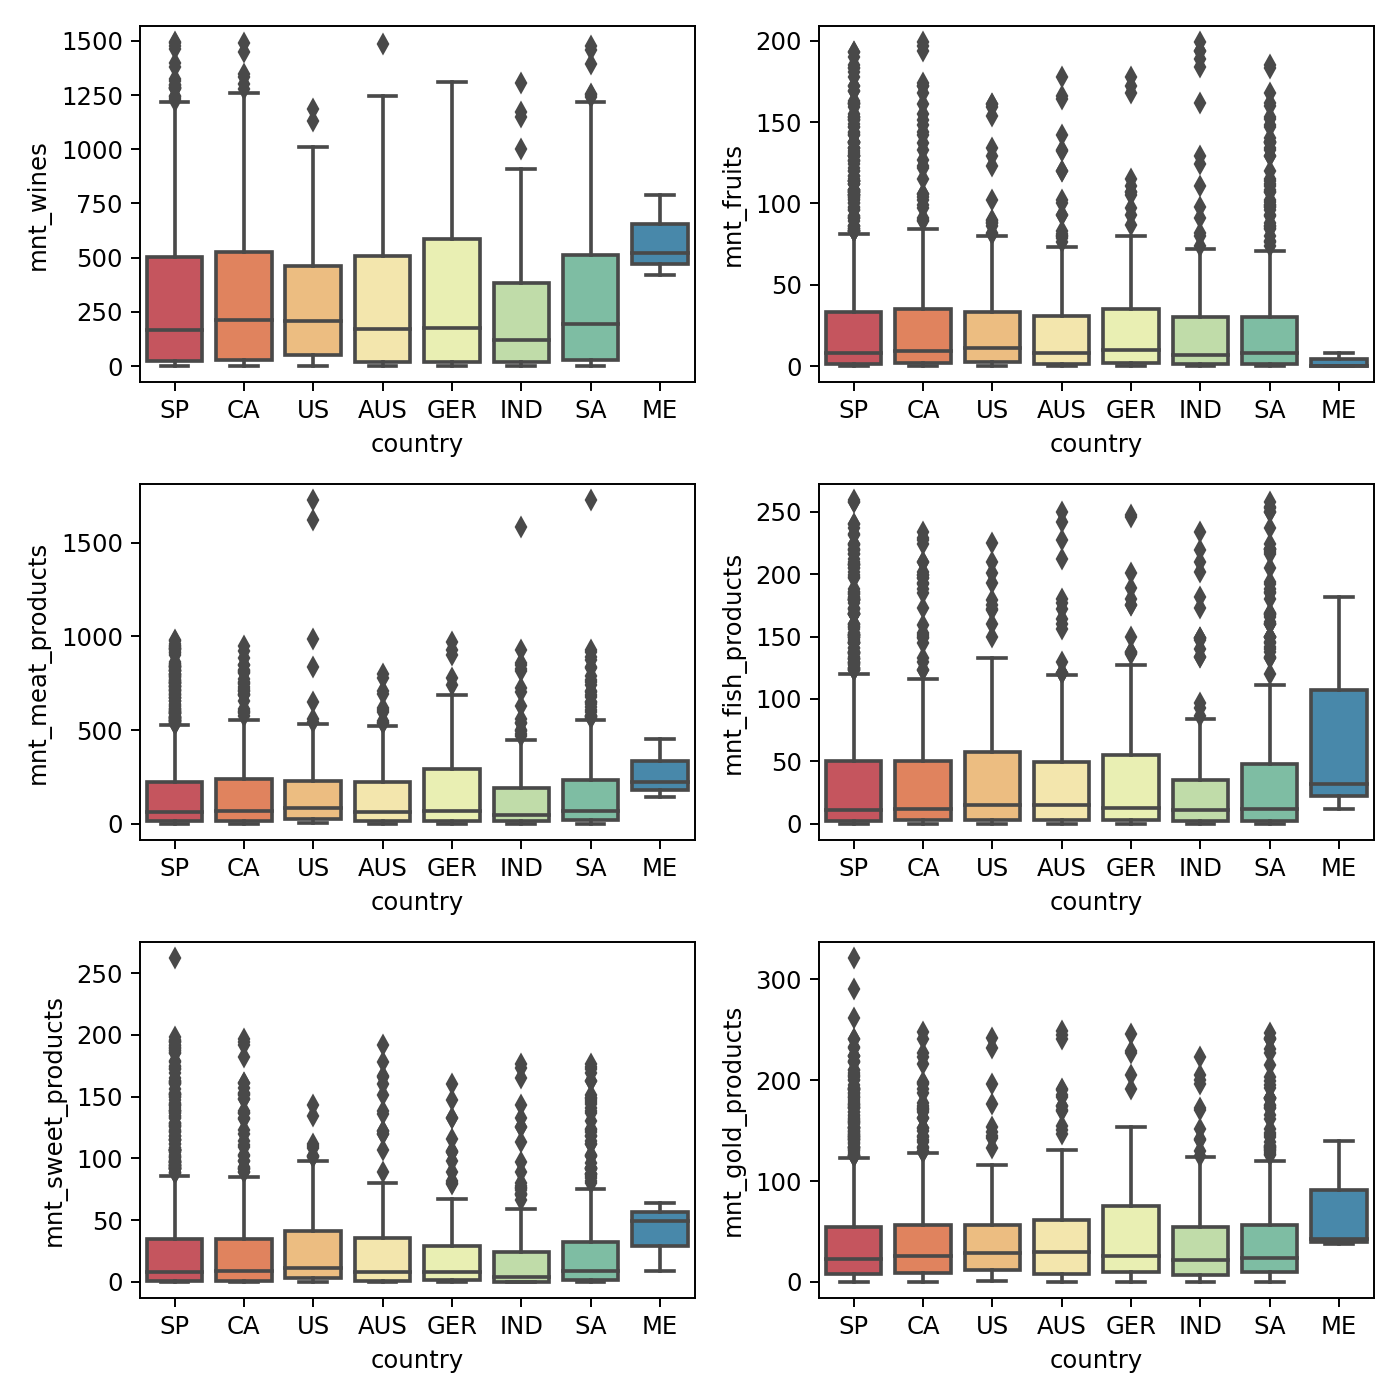

In [380]:
mnt_list = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']
fig = plt.figure(figsize=(8,8))
# for loop to go through length of amounts list
for i in range(len(mnt_list)):
    ax = plt.subplot(3,2, i+1)
    sns.boxplot(y=marketing_data[mnt_list[i]], x=marketing_data['country'], palette='Spectral')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_20816/2929039030.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (5,5))


<IPython.core.display.Javascript object>


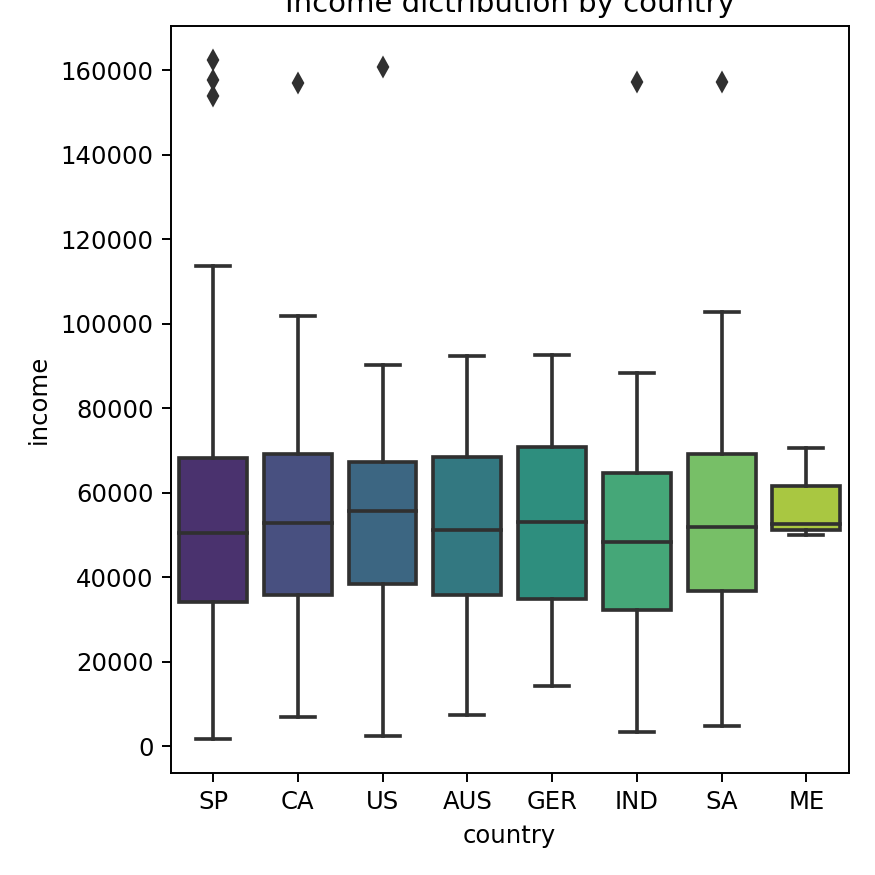

In [381]:
# alpha parameter helps to see concentration
fig = plt.figure(figsize = (5,5))
sns.boxplot(x= marketing_data['country'], y= marketing_data['income'], palette='viridis', )
plt.tight_layout()
plt.title('Income dictribution by country')
plt.show()

### Web page visitors <a class="anchor" id="section3_8"></a>
From our web page, visitors can make decision to buy our products or to visit store, subscribe to our catalog, find out about deals.
`describe()` method showed that, on average, customers visit our web page 5 times.
`AUS` customers visit our site less frequently.

In [382]:
marketing_data['num_web_visits_month'].describe()

count    2215.000000
mean        5.318736
std         2.425863
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: num_web_visits_month, dtype: float64

<IPython.core.display.Javascript object>


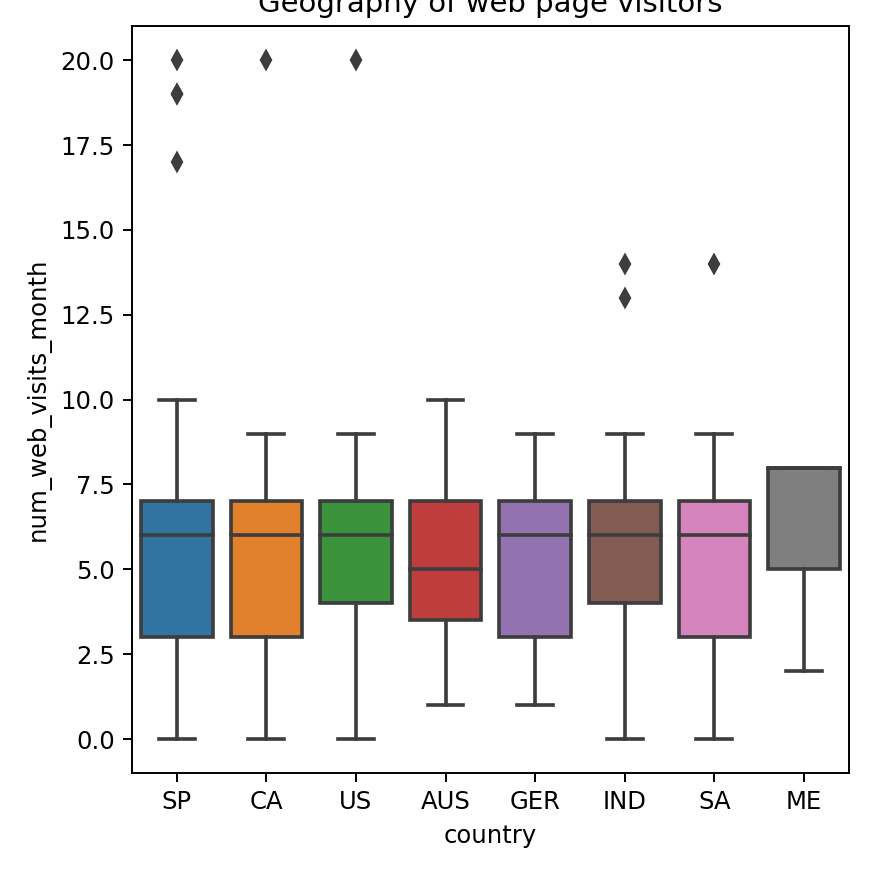

In [383]:
fig = plt.figure(figsize = (5,5))
sns.boxplot(x= marketing_data['country'], y= marketing_data['num_web_visits_month'])
plt.tight_layout()
plt.title('Geography of web page visitors')
plt.show()

From the `scatterplot` below we can see the negative linear correlation between `web page visits` and `income`.
Perhaps people with high income are older and do not use Internet that much.

We can assume, that our ads do not target people with higher income thus do not have high purchase rates.

We need to engage with a wider audience. Focus on wine and meat products can interest customers with higher incomes.

Side-by-side` boxplots` show that on average, people visit web page 5-6 times per month in each country.

<IPython.core.display.Javascript object>


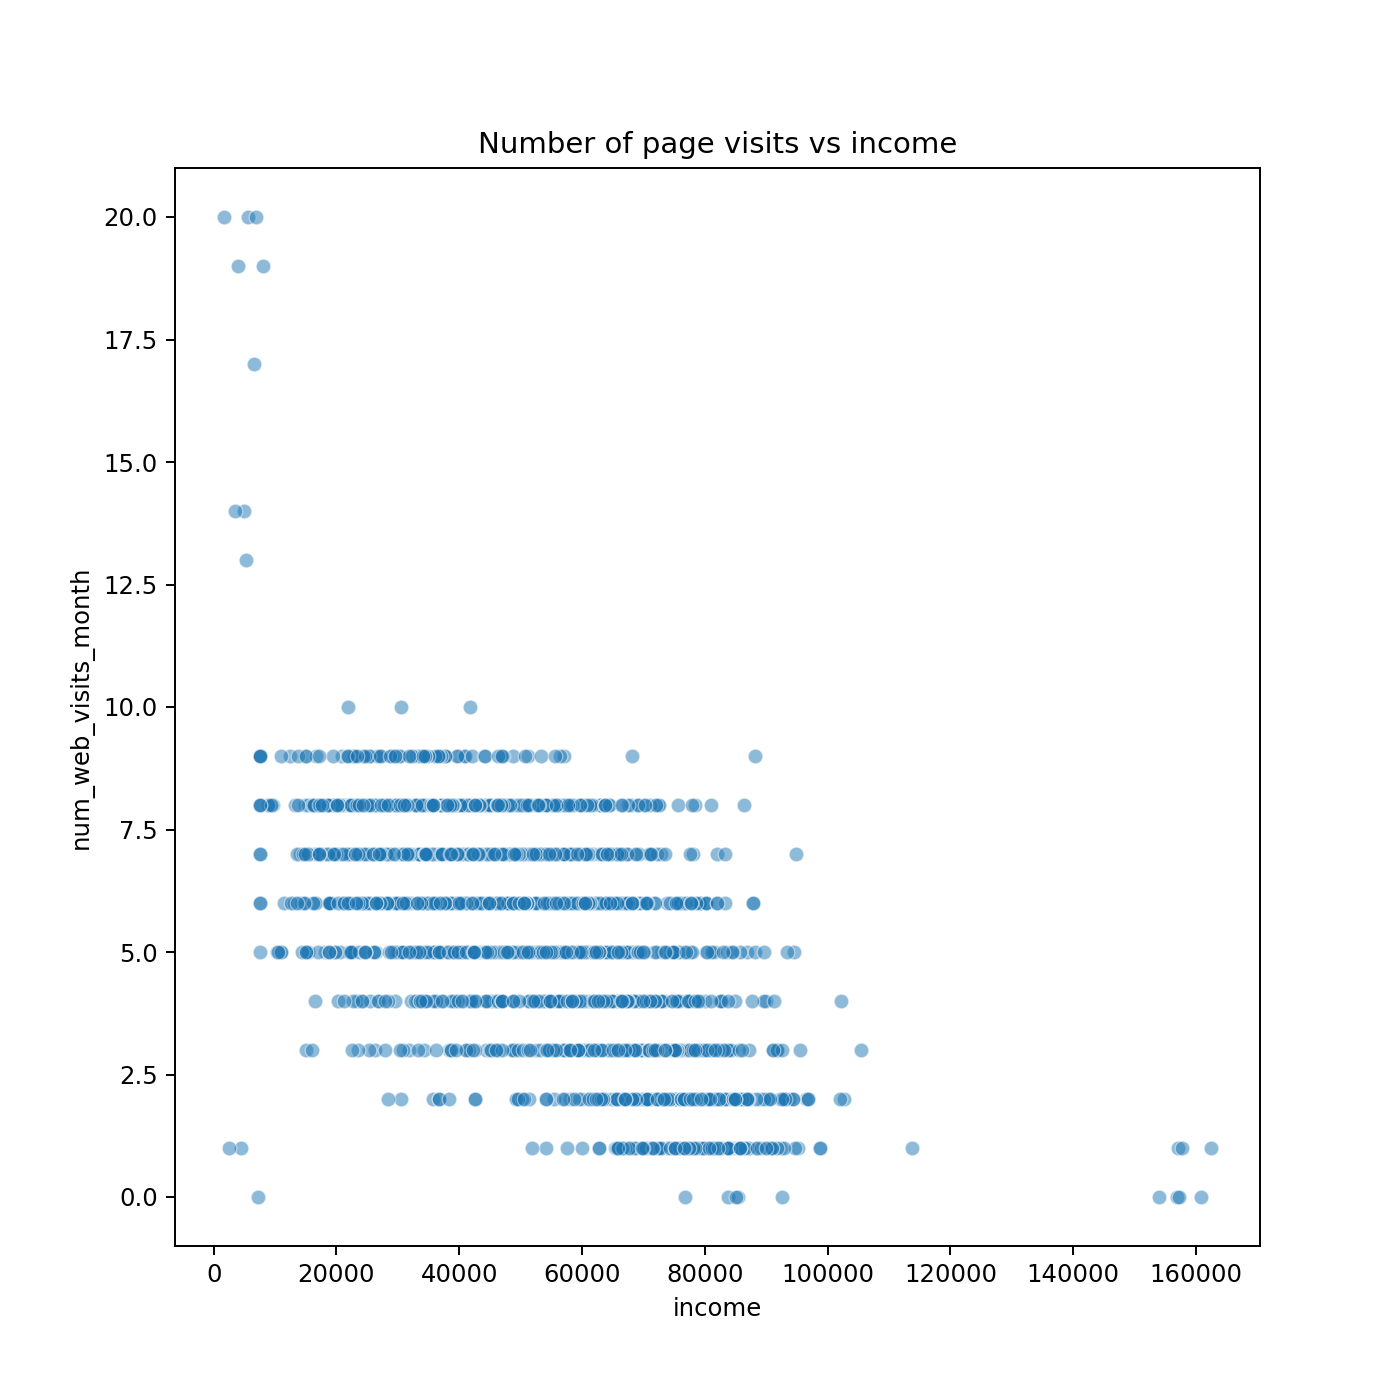

In [384]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x= marketing_data['income'], y= marketing_data['num_web_visits_month'], alpha = 0.5)
plt.title('Number of page visits vs income')
plt.show()

# Conclusions <a class="anchor" id="conclusions"></a>
## Findings Overview
It has been shown `income` has the strongest relationship with purchase behavior of customers. 
However, interesting insights about `education` and `age` along with `age_group` have still been noted. 
These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. 
There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 

In [329]:
marketing_data.to_csv('new_data.csv')